In [2]:
# %reload_ext snakeviz
%matplotlib inline
%run SBRG.py
import matplotlib.pyplot as plt
import time

In [3]:
#Need to create an index mapping to convert a 2D Pauli array into a 1D Pauli array
#For example, I have the term  A s_(0,0) s_(1,0) + B s_(0,0) s_(0,1) + C s_(0,0)s_(-1, 0) + D s_(0,0)s_(0, -1)
#Write as A s_01 + B s_02 + C s_03 + D s_04

def index_map(x, y, Lx, Ly): #Takes as inout the x,y index of the lattice point in a Lx x Ly size square lattice
    ind = y + Ly*x
    if ind>Lx*Ly - 1: 
        print("Out of Bounds")
        return None
    else: return ind

#index_map(1,3,2,4)    

In [4]:
def custom_2D_Ising(Lx, Ly, **para):
    # model - a dict of model parameters
    try: # set parameter alpha
        alpha = para['alpha']
        alpha_J = alpha
        alpha_mu = alpha
        alpha_h = alpha
    except:
        alpha_J = para.get('alpha_J',1)
        alpha_mu = para.get('alpha_mu',1)
        alpha_h = para.get('alpha_h',1)
    model = Model()
    model.size = Lx*Ly
    H_append = model.terms.append
    rnd_beta = random.betavariate
    for x in range(Lx):
        for y in range(Ly):
            
            ind_0 = index_map(x, y, Lx, Ly)
            ind_x_nbh = index_map((x+1)%Lx, y, Lx, Ly)
            ind_y_nbh = index_map(x, (y+1)%Ly, Lx, Ly)
            
            H_append(Term(mkMat({ind_0: 3, ind_x_nbh: 3}), -para['J']*rnd_beta(alpha_J, 1)))
            H_append(Term(mkMat({ind_0: 3, ind_y_nbh: 3}), -para['J']*rnd_beta(alpha_J, 1)))
            
            H_append(Term(mkMat({ind_0: 3}), -para['mu']*rnd_beta(alpha_mu, 1)))
            
            H_append(Term(mkMat({ind_0: 1}), -para['h']*rnd_beta(alpha_h, 1)))
    model.terms = [term for term in model.terms if abs(term.val) > 0]
    return model

def spin_spin_op(x1, y1, x2, y2, Lx, Ly):
    ind_i = index_map(x1, y1, Lx, Ly)
    ind_j = index_map(x2, y2, Lx, Ly)
    return Ham([Term(mkMat({ind_i: 3, ind_j: 3}), 1)])
    #return [Term(mkMat({ind_i: 3, ind_j: 3}), 1)]


In [38]:
Lx = 50
n_runs = 300
Ly_list = np.array([50])

J = 1.
h = 1.
mu = 0.

corr_array = np.zeros(shape=(len(Ly_list), Lx))

fname = "Spin_spin_corr_J"+str(J)+"_h"+str(h)+"_"+str(time.time())+".npz"
label = "Lx="+str(Lx)+"\nLy_list="+str(Ly_list)+"\nn_runs="+str(n_runs)

for i, Ly in enumerate(Ly_list):
    np.savez_compressed(fname, data=corr_array, label=label)
    for run in range(n_runs):
        H = custom_2D_Ising(Lx, Ly, **{'alpha':1., 'J': J, 'mu': mu, 'h': h})
        system = SBRG(H)

        system.tol = 0.
        system.max_rate = 1000.
        system.run()

        ground_state, energy = system.grndstate_blk()
        
        #if run%50==0: np.savez_compressed(fname, data=corr_array, label=label)
        
        for site in range(Lx):
            spin_01 = spin_spin_op(0,0,site,0, Lx, Ly)
            corr_array[i, site] += system.measure_ops(spin_01, ground_state)

            
np.savez_compressed(fname, data=corr_array, label=label)

190
the sum of the absolute values of trash is  0.1060437601111671
the max_len is 100 and the total num is 190
561
the sum of the absolute values of trash is  1.1338189036635264
the max_len is 170 and the total num is 561
66
the sum of the absolute values of trash is  0.037917534728977645
the max_len is 60 and the total num is 66
120
the sum of the absolute values of trash is  0.019003770170668646
the max_len is 80 and the total num is 120
120
325
the sum of the absolute values of trash is  0.01530302515060471
the max_len is 130 and the total num is 325
153
the sum of the absolute values of trash is  0.06982617687702372
the max_len is 90 and the total num is 153
66
the sum of the absolute values of trash is  0.011326312465634822
the max_len is 60 and the total num is 66
120
the sum of the absolute values of trash is  0.8599328999353091
the max_len is 80 and the total num is 120
153
780
the sum of the absolute values of trash is  0.7305529327110454
the max_len is 200 and the total num i

1225
the sum of the absolute values of trash is  2.4419168552430444
the max_len is 250 and the total num is 1225
91
the sum of the absolute values of trash is  0.013860288938738302
the max_len is 70 and the total num is 91
91
190
153
231
the sum of the absolute values of trash is  0.03209208539506058
the max_len is 110 and the total num is 231
91
231
the sum of the absolute values of trash is  0.012171024687300946
the max_len is 110 and the total num is 231
66
703
the sum of the absolute values of trash is  4.620121732480765
the max_len is 190 and the total num is 703
1275
the sum of the absolute values of trash is  1.0677952032502582
the max_len is 255 and the total num is 1275
435
66
561
the sum of the absolute values of trash is  0.07346009210836926
the max_len is 170 and the total num is 561
1176
the sum of the absolute values of trash is  0.02643510712039545
the max_len is 245 and the total num is 1176
66
91
the sum of the absolute values of trash is  0.26392037961536885
the max_l

378
the sum of the absolute values of trash is  0.2060870253349022
the max_len is 140 and the total num is 378
66
the sum of the absolute values of trash is  0.010866336100628598
the max_len is 60 and the total num is 66
91
465
the sum of the absolute values of trash is  0.0338755925725263
the max_len is 155 and the total num is 465
66
91
the sum of the absolute values of trash is  0.016211591555864262
the max_len is 70 and the total num is 91
990
the sum of the absolute values of trash is  0.03407256029847072
the max_len is 225 and the total num is 990
91
91
66
406
the sum of the absolute values of trash is  0.01702980088735252
the max_len is 145 and the total num is 406
66
66
120
the sum of the absolute values of trash is  0.16703298384429258
the max_len is 80 and the total num is 120
120
the sum of the absolute values of trash is  0.2532389241359848
the max_len is 80 and the total num is 120
120
231
the sum of the absolute values of trash is  0.5775123623345274
the max_len is 110 an

561
the sum of the absolute values of trash is  1.0753237982077888
the max_len is 170 and the total num is 561
190
703
the sum of the absolute values of trash is  0.4357253579401478
the max_len is 190 and the total num is 703
630
the sum of the absolute values of trash is  0.18716734192468115
the max_len is 180 and the total num is 630
171
the sum of the absolute values of trash is  0.02279255470739201
the max_len is 95 and the total num is 171
231
the sum of the absolute values of trash is  0.08585825012560157
the max_len is 110 and the total num is 231
3828
the sum of the absolute values of trash is  1.7346082117094923
the max_len is 440 and the total num is 3828
120
the sum of the absolute values of trash is  0.29590575122155477
the max_len is 80 and the total num is 120
190
the sum of the absolute values of trash is  0.12995352996337528
the max_len is 100 and the total num is 190
91
the sum of the absolute values of trash is  0.08460066555234716
the max_len is 70 and the total num 

13861
the sum of the absolute values of trash is  0.5550852925316166
the max_len is 835 and the total num is 13861
861
13041
the sum of the absolute values of trash is  5.101375155480906
the max_len is 810 and the total num is 13041
276
1540
1770
the sum of the absolute values of trash is  4.384095648250427
the max_len is 300 and the total num is 1770
7750
the sum of the absolute values of trash is  0.4101646877471536
the max_len is 625 and the total num is 7750
7750
the sum of the absolute values of trash is  0.4395637999841699
the max_len is 625 and the total num is 7750
6670
the sum of the absolute values of trash is  0.3059050430924842
the max_len is 580 and the total num is 6670
66430
the sum of the absolute values of trash is  11.956748589814953
the max_len is 1825 and the total num is 66430
66
153
91
the sum of the absolute values of trash is  0.42269211263779327
the max_len is 70 and the total num is 91
231
91
66
231
91
66
120
66
the sum of the absolute values of trash is  0.05

66
the sum of the absolute values of trash is  0.02919377834709816
the max_len is 60 and the total num is 66
91
435
the sum of the absolute values of trash is  0.0559895060504448
the max_len is 150 and the total num is 435
378
190
91
the sum of the absolute values of trash is  0.1277901565354573
the max_len is 70 and the total num is 91
325
the sum of the absolute values of trash is  0.2564928763298895
the max_len is 130 and the total num is 325
325
the sum of the absolute values of trash is  0.12579367828224416
the max_len is 130 and the total num is 325
231
the sum of the absolute values of trash is  0.5961200438228481
the max_len is 110 and the total num is 231
1326
the sum of the absolute values of trash is  0.09973711422722265
the max_len is 260 and the total num is 1326
91
253
the sum of the absolute values of trash is  1.8435952821803465
the max_len is 115 and the total num is 253
325
78
the sum of the absolute values of trash is  0.013522734572006383
the max_len is 65 and the t

780
the sum of the absolute values of trash is  0.749129938063698
the max_len is 200 and the total num is 780
210
the sum of the absolute values of trash is  0.19500158739402002
the max_len is 105 and the total num is 210
18336
the sum of the absolute values of trash is  45.080266392094
the max_len is 960 and the total num is 18336
210
66
703
the sum of the absolute values of trash is  0.5100350604216228
the max_len is 190 and the total num is 703
1035
the sum of the absolute values of trash is  3.466900321538079
the max_len is 230 and the total num is 1035
528
the sum of the absolute values of trash is  0.42003777877971193
the max_len is 165 and the total num is 528
378
435
the sum of the absolute values of trash is  0.7762449321627897
the max_len is 150 and the total num is 435
1081
the sum of the absolute values of trash is  0.012100467410093779
the max_len is 235 and the total num is 1081
2926
the sum of the absolute values of trash is  0.20568603718198256
the max_len is 385 and th

190
the sum of the absolute values of trash is  0.18548484571847051
the max_len is 100 and the total num is 190
171
the sum of the absolute values of trash is  0.07401858427962446
the max_len is 95 and the total num is 171
1275
the sum of the absolute values of trash is  1.444190545525277
the max_len is 255 and the total num is 1275
91
120
the sum of the absolute values of trash is  0.011345412192947272
the max_len is 80 and the total num is 120
171
the sum of the absolute values of trash is  0.012697057995954721
the max_len is 95 and the total num is 171
66
91
190
the sum of the absolute values of trash is  0.03141861097047983
the max_len is 100 and the total num is 190
190
the sum of the absolute values of trash is  4.85035192148097
the max_len is 100 and the total num is 190
153
the sum of the absolute values of trash is  0.909179003902523
the max_len is 90 and the total num is 153
630
the sum of the absolute values of trash is  0.12794768788120514
the max_len is 180 and the total n

91
630
the sum of the absolute values of trash is  0.374803081377375
the max_len is 180 and the total num is 630
120
the sum of the absolute values of trash is  0.0725018098892552
the max_len is 80 and the total num is 120
78
the sum of the absolute values of trash is  0.02647569949939977
the max_len is 65 and the total num is 78
378
the sum of the absolute values of trash is  0.07691197910546149
the max_len is 140 and the total num is 378
231
the sum of the absolute values of trash is  0.08979706873801542
the max_len is 110 and the total num is 231
276
the sum of the absolute values of trash is  0.023580332152666736
the max_len is 120 and the total num is 276
465
105
the sum of the absolute values of trash is  0.1856646534227333
the max_len is 75 and the total num is 105
276
the sum of the absolute values of trash is  0.7144040557219383
the max_len is 120 and the total num is 276
1326
the sum of the absolute values of trash is  1.1851002381487767
the max_len is 260 and the total num i

325
the sum of the absolute values of trash is  0.12614272396712045
the max_len is 130 and the total num is 325
120
the sum of the absolute values of trash is  0.14598161463835635
the max_len is 80 and the total num is 120
153
the sum of the absolute values of trash is  0.024080342136173865
the max_len is 90 and the total num is 153
91
the sum of the absolute values of trash is  0.07359378044873682
the max_len is 70 and the total num is 91
91
the sum of the absolute values of trash is  0.098665183028481
the max_len is 70 and the total num is 91
231
the sum of the absolute values of trash is  0.04806101816008304
the max_len is 110 and the total num is 231
153
the sum of the absolute values of trash is  0.04375100450958949
the max_len is 90 and the total num is 153
153
the sum of the absolute values of trash is  0.03379088501244977
the max_len is 90 and the total num is 153
120
the sum of the absolute values of trash is  0.013951190098700123
the max_len is 80 and the total num is 120
666

5995
the sum of the absolute values of trash is  0.6795766898132044
the max_len is 550 and the total num is 5995
66
66
66
66
the sum of the absolute values of trash is  0.014297168668317862
the max_len is 60 and the total num is 66
2145
the sum of the absolute values of trash is  0.09386275855487783
the max_len is 330 and the total num is 2145
190
the sum of the absolute values of trash is  0.10724777529192749
the max_len is 100 and the total num is 190
105
the sum of the absolute values of trash is  0.018848531085941204
the max_len is 75 and the total num is 105
91
300
the sum of the absolute values of trash is  0.16702853049063732
the max_len is 125 and the total num is 300
91
the sum of the absolute values of trash is  0.15727160474520047
the max_len is 70 and the total num is 91
741
the sum of the absolute values of trash is  7.0322330580724195
the max_len is 195 and the total num is 741
153
the sum of the absolute values of trash is  0.5263150249582179
the max_len is 90 and the to

66
the sum of the absolute values of trash is  0.01742508557098474
the max_len is 60 and the total num is 66
190
595
the sum of the absolute values of trash is  0.018053258595518568
the max_len is 175 and the total num is 595
3486
the sum of the absolute values of trash is  2.368530560641523
the max_len is 420 and the total num is 3486
528
the sum of the absolute values of trash is  0.15665198192358082
the max_len is 165 and the total num is 528
120
496
the sum of the absolute values of trash is  5.711802145050925
the max_len is 160 and the total num is 496
496
the sum of the absolute values of trash is  4.348011346114739
the max_len is 160 and the total num is 496
2926
the sum of the absolute values of trash is  24.486641418463474
the max_len is 385 and the total num is 2926
171
the sum of the absolute values of trash is  1.1738543236082037
the max_len is 95 and the total num is 171
595
the sum of the absolute values of trash is  0.5321248730606476
the max_len is 175 and the total num

741
the sum of the absolute values of trash is  0.5136610298829396
the max_len is 195 and the total num is 741
190
120
the sum of the absolute values of trash is  0.7462377800800167
the max_len is 80 and the total num is 120
91
the sum of the absolute values of trash is  0.14542770883958622
the max_len is 70 and the total num is 91
190
the sum of the absolute values of trash is  1.71508773603428
the max_len is 100 and the total num is 190
465
the sum of the absolute values of trash is  0.22804420723941302
the max_len is 155 and the total num is 465
3240
the sum of the absolute values of trash is  6.047602773455451
the max_len is 405 and the total num is 3240
66
the sum of the absolute values of trash is  0.019214338865226294
the max_len is 60 and the total num is 66
703
the sum of the absolute values of trash is  0.8540421137211064
the max_len is 190 and the total num is 703
1653
the sum of the absolute values of trash is  5.187037580220815
the max_len is 290 and the total num is 1653


66
66
153
the sum of the absolute values of trash is  0.0360113961425563
the max_len is 90 and the total num is 153
3160
the sum of the absolute values of trash is  1.6664437426474636
the max_len is 400 and the total num is 3160
66
120
the sum of the absolute values of trash is  0.01585543253207929
the max_len is 80 and the total num is 120
66
6670
the sum of the absolute values of trash is  0.5576089062019677
the max_len is 580 and the total num is 6670
24531
the sum of the absolute values of trash is  1.9427338231375666
the max_len is 1110 and the total num is 24531
91
the sum of the absolute values of trash is  0.014641806401832644
the max_len is 70 and the total num is 91
325
the sum of the absolute values of trash is  4.504220283934242
the max_len is 130 and the total num is 325
98346
the sum of the absolute values of trash is  7.868338408224444
the max_len is 2220 and the total num is 98346
43956
the sum of the absolute values of trash is  44.07264481346773
the max_len is 1485 an

66
66
741
561
the sum of the absolute values of trash is  6.709416732410172
the max_len is 170 and the total num is 561
120
the sum of the absolute values of trash is  0.07973255249016346
the max_len is 80 and the total num is 120
66
190
66
the sum of the absolute values of trash is  0.03529835596608975
the max_len is 60 and the total num is 66
3081
the sum of the absolute values of trash is  0.017702590272999114
the max_len is 395 and the total num is 3081
91
the sum of the absolute values of trash is  0.021354615596709536
the max_len is 70 and the total num is 91
153
the sum of the absolute values of trash is  0.11179039970524769
the max_len is 90 and the total num is 153
153
the sum of the absolute values of trash is  0.1503222916584
the max_len is 90 and the total num is 153
66
the sum of the absolute values of trash is  0.039149764982246496
the max_len is 60 and the total num is 66
595
the sum of the absolute values of trash is  0.017456569598950897
the max_len is 175 and the tota

91
the sum of the absolute values of trash is  0.13491424293813445
the max_len is 70 and the total num is 91
153
the sum of the absolute values of trash is  0.1453707714438542
the max_len is 90 and the total num is 153
3081
the sum of the absolute values of trash is  1.4168937367969898
the max_len is 395 and the total num is 3081
465
the sum of the absolute values of trash is  0.0716000184459837
the max_len is 155 and the total num is 465
990
the sum of the absolute values of trash is  0.20051591449209966
the max_len is 225 and the total num is 990
325
the sum of the absolute values of trash is  0.09243293057398874
the max_len is 130 and the total num is 325
3403
the sum of the absolute values of trash is  7.301734965711175
the max_len is 415 and the total num is 3403
66
66
231
the sum of the absolute values of trash is  0.45661028315653557
the max_len is 110 and the total num is 231
325
the sum of the absolute values of trash is  0.4121507016681156
the max_len is 130 and the total num

190
the sum of the absolute values of trash is  1.6485744016129737
the max_len is 100 and the total num is 190
91
66
561
the sum of the absolute values of trash is  1.1998491884062485
the max_len is 170 and the total num is 561
435
the sum of the absolute values of trash is  1.0775250514014842
the max_len is 150 and the total num is 435
351
666
the sum of the absolute values of trash is  0.2372488127994358
the max_len is 185 and the total num is 666
276
the sum of the absolute values of trash is  2.881675914981882
the max_len is 120 and the total num is 276
666
the sum of the absolute values of trash is  3.4877302655525075
the max_len is 185 and the total num is 666
91
666
the sum of the absolute values of trash is  0.3398893065743858
the max_len is 185 and the total num is 666
406
the sum of the absolute values of trash is  0.145762345379206
the max_len is 145 and the total num is 406
1275
the sum of the absolute values of trash is  14.564101633730337
the max_len is 255 and the total 

210
120
66
120
the sum of the absolute values of trash is  0.06829484094748439
the max_len is 80 and the total num is 120
2775
the sum of the absolute values of trash is  5.46021177794529
the max_len is 375 and the total num is 2775
666
the sum of the absolute values of trash is  0.10077021716501901
the max_len is 185 and the total num is 666
153
300
the sum of the absolute values of trash is  0.054778060618645784
the max_len is 125 and the total num is 300
153
276
91
780
the sum of the absolute values of trash is  0.6339405400224761
the max_len is 200 and the total num is 780
171
the sum of the absolute values of trash is  0.02976996221164021
the max_len is 95 and the total num is 171
120
the sum of the absolute values of trash is  0.12431303598751188
the max_len is 80 and the total num is 120
231
703
the sum of the absolute values of trash is  0.017063508918178198
the max_len is 190 and the total num is 703
153
the sum of the absolute values of trash is  0.5106632734054699
the max_le

325
the sum of the absolute values of trash is  0.10237703361218678
the max_len is 130 and the total num is 325
325
the sum of the absolute values of trash is  0.05496139846950672
the max_len is 130 and the total num is 325
45753
the sum of the absolute values of trash is  0.5065753566230604
the max_len is 1515 and the total num is 45753
3486
the sum of the absolute values of trash is  0.02462037637286927
the max_len is 420 and the total num is 3486
2080
the sum of the absolute values of trash is  0.014822314982467489
the max_len is 325 and the total num is 2080
18721
the sum of the absolute values of trash is  0.5415158971123086
the max_len is 970 and the total num is 18721
190
the sum of the absolute values of trash is  1.203151326781241
the max_len is 100 and the total num is 190
120
the sum of the absolute values of trash is  0.061596299294250076
the max_len is 80 and the total num is 120
231
the sum of the absolute values of trash is  0.2990209333196561
the max_len is 110 and the 

91
1540
the sum of the absolute values of trash is  1.8919483792658127
the max_len is 280 and the total num is 1540
190
the sum of the absolute values of trash is  0.014255096891447688
the max_len is 100 and the total num is 190
78
16653
the sum of the absolute values of trash is  106.0953874097403
the max_len is 915 and the total num is 16653
27966
the sum of the absolute values of trash is  298.06360389758976
the max_len is 1185 and the total num is 27966
2926
the sum of the absolute values of trash is  1.4110491483897925
the max_len is 385 and the total num is 2926
66
66
the sum of the absolute values of trash is  0.07065921225431081
the max_len is 60 and the total num is 66
406
153
the sum of the absolute values of trash is  0.42051450132094875
the max_len is 90 and the total num is 153
120
190
the sum of the absolute values of trash is  0.5691691502561637
the max_len is 100 and the total num is 190
66
190
the sum of the absolute values of trash is  0.10447505534703198
the max_len 

1770
the sum of the absolute values of trash is  3.814110042418431
the max_len is 300 and the total num is 1770
3003
the sum of the absolute values of trash is  0.44007719067969586
the max_len is 390 and the total num is 3003
1770
the sum of the absolute values of trash is  0.41225370001088363
the max_len is 300 and the total num is 1770
120
the sum of the absolute values of trash is  0.1474630692945039
the max_len is 80 and the total num is 120
351
the sum of the absolute values of trash is  0.17365630825616507
the max_len is 135 and the total num is 351
153
the sum of the absolute values of trash is  0.11149081862288993
the max_len is 90 and the total num is 153
190
the sum of the absolute values of trash is  0.01419361934897464
the max_len is 100 and the total num is 190
528
the sum of the absolute values of trash is  0.0811475859271333
the max_len is 165 and the total num is 528
666
the sum of the absolute values of trash is  0.1187981720372015
the max_len is 185 and the total num 

1711
the sum of the absolute values of trash is  0.23584255023541056
the max_len is 295 and the total num is 1711
190
the sum of the absolute values of trash is  0.012376408271158495
the max_len is 100 and the total num is 190
435
the sum of the absolute values of trash is  0.4827840965638981
the max_len is 150 and the total num is 435
153
the sum of the absolute values of trash is  0.12481896217127544
the max_len is 90 and the total num is 153
3828
the sum of the absolute values of trash is  4.514881680939096
the max_len is 440 and the total num is 3828
66
66
153
the sum of the absolute values of trash is  0.2869300690074971
the max_len is 90 and the total num is 153
351
the sum of the absolute values of trash is  0.1484262078010201
the max_len is 135 and the total num is 351
5356
the sum of the absolute values of trash is  117.46260536628262
the max_len is 520 and the total num is 5356
190
the sum of the absolute values of trash is  0.01645967051985205
the max_len is 100 and the tota

66
the sum of the absolute values of trash is  0.025430258424871614
the max_len is 60 and the total num is 66
300
the sum of the absolute values of trash is  0.04412650055580221
the max_len is 125 and the total num is 300
120
the sum of the absolute values of trash is  0.01035834842882511
the max_len is 80 and the total num is 120
66
300
the sum of the absolute values of trash is  0.26708998008468665
the max_len is 125 and the total num is 300
231
the sum of the absolute values of trash is  0.16382236697238464
the max_len is 110 and the total num is 231
66
276
the sum of the absolute values of trash is  0.011412624771693355
the max_len is 120 and the total num is 276
171
the sum of the absolute values of trash is  0.024614639171949757
the max_len is 95 and the total num is 171
190
the sum of the absolute values of trash is  0.06518217382292091
the max_len is 100 and the total num is 190
66
496
the sum of the absolute values of trash is  0.24462496301533526
the max_len is 160 and the to

2145
the sum of the absolute values of trash is  0.21213084120510314
the max_len is 330 and the total num is 2145
66
253
the sum of the absolute values of trash is  0.22933226463577047
the max_len is 115 and the total num is 253
1653
the sum of the absolute values of trash is  0.9608624273325902
the max_len is 290 and the total num is 1653
136
the sum of the absolute values of trash is  0.13936971771836887
the max_len is 85 and the total num is 136
91
the sum of the absolute values of trash is  0.0751239939526661
the max_len is 70 and the total num is 91
153
the sum of the absolute values of trash is  0.09119683018566192
the max_len is 90 and the total num is 153
210
1953
the sum of the absolute values of trash is  3.786988421123638
the max_len is 315 and the total num is 1953
171
253
the sum of the absolute values of trash is  1.1318771326110038
the max_len is 115 and the total num is 253
66
231
the sum of the absolute values of trash is  0.024388502194855707
the max_len is 110 and th

3003
the sum of the absolute values of trash is  9.420592941237338
the max_len is 390 and the total num is 3003
171
the sum of the absolute values of trash is  0.3294549686886715
the max_len is 95 and the total num is 171
703
the sum of the absolute values of trash is  0.057116611734172165
the max_len is 190 and the total num is 703
190
the sum of the absolute values of trash is  0.5711167839391335
the max_len is 100 and the total num is 190
231
the sum of the absolute values of trash is  0.13710712041955542
the max_len is 110 and the total num is 231
231
the sum of the absolute values of trash is  0.10909609974648844
the max_len is 110 and the total num is 231
325
the sum of the absolute values of trash is  1.2469454345543824
the max_len is 130 and the total num is 325
66
66
66
231
the sum of the absolute values of trash is  0.2395208451729002
the max_len is 110 and the total num is 231
91
190
190
66
120
the sum of the absolute values of trash is  0.1716678238949394
the max_len is 80 

528
496
the sum of the absolute values of trash is  0.03277711011959871
the max_len is 160 and the total num is 496
66
the sum of the absolute values of trash is  0.023396770968679648
the max_len is 60 and the total num is 66
210
the sum of the absolute values of trash is  0.9828977536049516
the max_len is 105 and the total num is 210
1891
the sum of the absolute values of trash is  12.024287050653612
the max_len is 310 and the total num is 1891
78
153
66
91
the sum of the absolute values of trash is  0.019478618296990737
the max_len is 70 and the total num is 91
91
the sum of the absolute values of trash is  0.01587954304631387
the max_len is 70 and the total num is 91
66
2556
the sum of the absolute values of trash is  1.1928984175695898
the max_len is 360 and the total num is 2556
253
the sum of the absolute values of trash is  0.6888047839308308
the max_len is 115 and the total num is 253
120
the sum of the absolute values of trash is  0.06911046555829749
the max_len is 80 and the 

190
the sum of the absolute values of trash is  0.06608782546012441
the max_len is 100 and the total num is 190
136
the sum of the absolute values of trash is  0.2557553007769111
the max_len is 85 and the total num is 136
153
the sum of the absolute values of trash is  0.03158711591277255
the max_len is 90 and the total num is 153
91
the sum of the absolute values of trash is  0.026301319096503586
the max_len is 70 and the total num is 91
136
946
the sum of the absolute values of trash is  2.261185547684378
the max_len is 220 and the total num is 946
153
496
the sum of the absolute values of trash is  0.10258428683784812
the max_len is 160 and the total num is 496
120
18721
the sum of the absolute values of trash is  38.165066945669764
the max_len is 970 and the total num is 18721
91
120
190
the sum of the absolute values of trash is  0.020709331686444572
the max_len is 100 and the total num is 190
2080
the sum of the absolute values of trash is  6.08125401747682
the max_len is 325 and

1275
the sum of the absolute values of trash is  0.05887993120118079
the max_len is 255 and the total num is 1275
5671
the sum of the absolute values of trash is  1.8160316767330207
the max_len is 535 and the total num is 5671
153
the sum of the absolute values of trash is  0.22170470787344906
the max_len is 90 and the total num is 153
861
the sum of the absolute values of trash is  0.040668361307256165
the max_len is 210 and the total num is 861
276
the sum of the absolute values of trash is  0.11477256597302711
the max_len is 120 and the total num is 276
861
the sum of the absolute values of trash is  0.44125481116614135
the max_len is 210 and the total num is 861
66
the sum of the absolute values of trash is  0.01126396804043061
the max_len is 60 and the total num is 66
14196
the sum of the absolute values of trash is  4.920686384945793
the max_len is 845 and the total num is 14196
53956
the sum of the absolute values of trash is  71.31834116219667
the max_len is 1645 and the total 

5151
the sum of the absolute values of trash is  3.1953091332074686
the max_len is 510 and the total num is 5151
190
the sum of the absolute values of trash is  0.02739113331999598
the max_len is 100 and the total num is 190
120
the sum of the absolute values of trash is  0.18859970892952643
the max_len is 80 and the total num is 120
153
the sum of the absolute values of trash is  1.1136952031023044
the max_len is 90 and the total num is 153
666
the sum of the absolute values of trash is  0.029406676632292798
the max_len is 185 and the total num is 666
378
the sum of the absolute values of trash is  0.37367053503838277
the max_len is 140 and the total num is 378
91
the sum of the absolute values of trash is  0.697878386124357
the max_len is 70 and the total num is 91
120
903
the sum of the absolute values of trash is  0.33996260796586136
the max_len is 215 and the total num is 903
1431
the sum of the absolute values of trash is  0.44405219293535125
the max_len is 270 and the total num 

9180
the sum of the absolute values of trash is  49.20025636058267
the max_len is 680 and the total num is 9180
190
the sum of the absolute values of trash is  0.08371584182124729
the max_len is 100 and the total num is 190
3160
the sum of the absolute values of trash is  3.0498640882228023
the max_len is 400 and the total num is 3160
4371
the sum of the absolute values of trash is  0.6740313009967023
the max_len is 470 and the total num is 4371
190
3655
the sum of the absolute values of trash is  1.3302813340021833
the max_len is 430 and the total num is 3655
1431
the sum of the absolute values of trash is  0.5203061174398024
the max_len is 270 and the total num is 1431
703
the sum of the absolute values of trash is  0.011322958575499127
the max_len is 190 and the total num is 703
703
the sum of the absolute values of trash is  0.04354708316396954
the max_len is 190 and the total num is 703
8646
the sum of the absolute values of trash is  5.557104623996523
the max_len is 660 and the t

120
the sum of the absolute values of trash is  0.60574219143563
the max_len is 80 and the total num is 120
630
the sum of the absolute values of trash is  4.766191604184853
the max_len is 180 and the total num is 630
496
the sum of the absolute values of trash is  1.0923220315714368
the max_len is 160 and the total num is 496
190
the sum of the absolute values of trash is  0.8013814869857976
the max_len is 100 and the total num is 190
120
the sum of the absolute values of trash is  0.017742884837569167
the max_len is 80 and the total num is 120
190
the sum of the absolute values of trash is  0.03652431910947835
the max_len is 100 and the total num is 190
190
the sum of the absolute values of trash is  0.15875701230516975
the max_len is 100 and the total num is 190
66
325
the sum of the absolute values of trash is  0.03377977516927479
the max_len is 130 and the total num is 325
91
741
the sum of the absolute values of trash is  4.905334451995724
the max_len is 195 and the total num is 

210
66
190
1225
the sum of the absolute values of trash is  0.059532293466270994
the max_len is 250 and the total num is 1225
66
406
the sum of the absolute values of trash is  3.510835745299972
the max_len is 145 and the total num is 406
66
496
the sum of the absolute values of trash is  1.0014761302110378
the max_len is 160 and the total num is 496
666
the sum of the absolute values of trash is  1.3518125759605781
the max_len is 185 and the total num is 666
703
the sum of the absolute values of trash is  5.482000454358653
the max_len is 190 and the total num is 703
325
the sum of the absolute values of trash is  3.0816650924441817
the max_len is 130 and the total num is 325
435
630
the sum of the absolute values of trash is  0.35304800405417974
the max_len is 180 and the total num is 630
91
153
the sum of the absolute values of trash is  0.024270489360463842
the max_len is 90 and the total num is 153
276
66
91
the sum of the absolute values of trash is  0.052885783104806086
the max_l

1431
the sum of the absolute values of trash is  8.2014065804061
the max_len is 270 and the total num is 1431
190
the sum of the absolute values of trash is  0.04607181428193037
the max_len is 100 and the total num is 190
300
the sum of the absolute values of trash is  0.12381513534507663
the max_len is 125 and the total num is 300
91
666
the sum of the absolute values of trash is  0.5368811653572053
the max_len is 185 and the total num is 666
561
the sum of the absolute values of trash is  0.04493303494391977
the max_len is 170 and the total num is 561
276
the sum of the absolute values of trash is  0.14216532310625243
the max_len is 120 and the total num is 276
120
378
the sum of the absolute values of trash is  0.8094131315395143
the max_len is 140 and the total num is 378
210
the sum of the absolute values of trash is  0.41887491709911223
the max_len is 105 and the total num is 210
435
190
the sum of the absolute values of trash is  0.02413903213243653
the max_len is 100 and the to

120
153
1653
the sum of the absolute values of trash is  1.0983018727695752
the max_len is 290 and the total num is 1653
66
66
630
the sum of the absolute values of trash is  0.49348444408035513
the max_len is 180 and the total num is 630
190
the sum of the absolute values of trash is  0.08671062949100411
the max_len is 100 and the total num is 190
91
66
528
91
the sum of the absolute values of trash is  0.02938517388754906
the max_len is 70 and the total num is 91
276
the sum of the absolute values of trash is  3.06756272313336
the max_len is 120 and the total num is 276
120
630
the sum of the absolute values of trash is  0.3407816654237321
the max_len is 180 and the total num is 630
276
the sum of the absolute values of trash is  2.325117758457006
the max_len is 120 and the total num is 276
325
the sum of the absolute values of trash is  2.1209927932734676
the max_len is 130 and the total num is 325
1225
the sum of the absolute values of trash is  10.687753291168638
the max_len is 25

66
66
91
the sum of the absolute values of trash is  0.09352365077038978
the max_len is 70 and the total num is 91
8001
the sum of the absolute values of trash is  0.16110792962675224
the max_len is 635 and the total num is 8001
66
6670
the sum of the absolute values of trash is  0.11756427767522451
the max_len is 580 and the total num is 6670
351
the sum of the absolute values of trash is  2.5035185124550843
the max_len is 135 and the total num is 351
66
435
the sum of the absolute values of trash is  0.8441658315846281
the max_len is 150 and the total num is 435
561
the sum of the absolute values of trash is  0.021197715151930942
the max_len is 170 and the total num is 561
496
the sum of the absolute values of trash is  0.6168316183450124
the max_len is 160 and the total num is 496
276
the sum of the absolute values of trash is  0.03376482090483237
the max_len is 120 and the total num is 276
1711
the sum of the absolute values of trash is  16.3736254411798
the max_len is 295 and the 

741
the sum of the absolute values of trash is  0.03866796236644691
the max_len is 195 and the total num is 741
630
the sum of the absolute values of trash is  0.8180696015712545
the max_len is 180 and the total num is 630
120
190
the sum of the absolute values of trash is  0.09297472891344208
the max_len is 100 and the total num is 190
630
the sum of the absolute values of trash is  0.11154901711501924
the max_len is 180 and the total num is 630
703
the sum of the absolute values of trash is  0.906488171550753
the max_len is 190 and the total num is 703
1128
the sum of the absolute values of trash is  1.6566505113412593
the max_len is 240 and the total num is 1128
465
190
the sum of the absolute values of trash is  1.3277388429790988
the max_len is 100 and the total num is 190
91
the sum of the absolute values of trash is  0.01968135858281314
the max_len is 70 and the total num is 91
276
the sum of the absolute values of trash is  4.607047826371627
the max_len is 120 and the total num

378
the sum of the absolute values of trash is  0.11782911182059547
the max_len is 140 and the total num is 378
66
the sum of the absolute values of trash is  0.33081165151673964
the max_len is 60 and the total num is 66
231
the sum of the absolute values of trash is  0.05799523652475144
the max_len is 110 and the total num is 231
171
the sum of the absolute values of trash is  0.0517366189348972
the max_len is 95 and the total num is 171
1770
the sum of the absolute values of trash is  2.183310939639426
the max_len is 300 and the total num is 1770
91
the sum of the absolute values of trash is  0.24056732252994995
the max_len is 70 and the total num is 91
91
the sum of the absolute values of trash is  0.05504213459881252
the max_len is 70 and the total num is 91
66
903
153
the sum of the absolute values of trash is  0.0913438087521354
the max_len is 90 and the total num is 153
903
the sum of the absolute values of trash is  8.788461648045729
the max_len is 215 and the total num is 903


91
the sum of the absolute values of trash is  0.13400747760897305
the max_len is 70 and the total num is 91
120
496
the sum of the absolute values of trash is  0.20009046299523003
the max_len is 160 and the total num is 496
8911
the sum of the absolute values of trash is  0.4353698393213834
the max_len is 670 and the total num is 8911
190
the sum of the absolute values of trash is  0.07810332430920815
the max_len is 100 and the total num is 190
3003
the sum of the absolute values of trash is  13.075021826534346
the max_len is 390 and the total num is 3003
190
the sum of the absolute values of trash is  0.0537004106776086
the max_len is 100 and the total num is 190
2850
the sum of the absolute values of trash is  0.011374605156359064
the max_len is 380 and the total num is 2850
1953
the sum of the absolute values of trash is  0.2872097648082456
the max_len is 315 and the total num is 1953
120
the sum of the absolute values of trash is  1.2961653833823483
the max_len is 80 and the total

780
the sum of the absolute values of trash is  0.6476865925657113
the max_len is 200 and the total num is 780
351
231
the sum of the absolute values of trash is  0.13595236810209435
the max_len is 110 and the total num is 231
153
the sum of the absolute values of trash is  0.063905540485577
the max_len is 90 and the total num is 153
153
the sum of the absolute values of trash is  0.23539876674330035
the max_len is 90 and the total num is 153
231
the sum of the absolute values of trash is  0.11692041964200764
the max_len is 110 and the total num is 231
120
300
the sum of the absolute values of trash is  1.3934007363567233
the max_len is 125 and the total num is 300
91
the sum of the absolute values of trash is  0.07471442830071719
the max_len is 70 and the total num is 91
66
171
the sum of the absolute values of trash is  0.20645539857895626
the max_len is 95 and the total num is 171
276
120
the sum of the absolute values of trash is  0.16938170466770633
the max_len is 80 and the total

435
120
the sum of the absolute values of trash is  0.06740490477335068
the max_len is 80 and the total num is 120
66
325
120
the sum of the absolute values of trash is  0.0868716885158096
the max_len is 80 and the total num is 120
171
the sum of the absolute values of trash is  0.7497227184990978
the max_len is 95 and the total num is 171
153
the sum of the absolute values of trash is  0.09820754823396526
the max_len is 90 and the total num is 153
253
the sum of the absolute values of trash is  0.02994072193244285
the max_len is 115 and the total num is 253
325
the sum of the absolute values of trash is  0.07503682201270136
the max_len is 130 and the total num is 325
91
66
351
66
153
the sum of the absolute values of trash is  0.7710327095176744
the max_len is 90 and the total num is 153
528
the sum of the absolute values of trash is  1.8002865169866749
the max_len is 165 and the total num is 528
91
the sum of the absolute values of trash is  0.12929326302409927
the max_len is 70 and 

378
the sum of the absolute values of trash is  0.411199328948396
the max_len is 140 and the total num is 378
153
the sum of the absolute values of trash is  0.014735332395392707
the max_len is 90 and the total num is 153
435
the sum of the absolute values of trash is  0.01941789566218389
the max_len is 150 and the total num is 435
120
the sum of the absolute values of trash is  0.07063332296548598
the max_len is 80 and the total num is 120
91
1540
the sum of the absolute values of trash is  0.3476230071172138
the max_len is 280 and the total num is 1540
66
465
the sum of the absolute values of trash is  0.4819232071856908
the max_len is 155 and the total num is 465
325
the sum of the absolute values of trash is  0.058651609943679905
the max_len is 130 and the total num is 325
528
120
190
120
the sum of the absolute values of trash is  0.23777713494117533
the max_len is 80 and the total num is 120
231
the sum of the absolute values of trash is  0.2917573315165067
the max_len is 110 and

66
66
66
120
153
the sum of the absolute values of trash is  0.03228741763111069
the max_len is 90 and the total num is 153
153
the sum of the absolute values of trash is  0.0410911615647039
the max_len is 90 and the total num is 153
325
the sum of the absolute values of trash is  0.03996101209938171
the max_len is 130 and the total num is 325
820
the sum of the absolute values of trash is  0.2608875887005781
the max_len is 205 and the total num is 820
66
190
the sum of the absolute values of trash is  0.023907634502215672
the max_len is 100 and the total num is 190
378
the sum of the absolute values of trash is  0.1410737198173668
the max_len is 140 and the total num is 378
1653
the sum of the absolute values of trash is  20.834940401586504
the max_len is 290 and the total num is 1653
3240
the sum of the absolute values of trash is  0.18116725761528654
the max_len is 405 and the total num is 3240
153
91
the sum of the absolute values of trash is  0.035418508932476556
the max_len is 70

210
the sum of the absolute values of trash is  0.014537020849353158
the max_len is 105 and the total num is 210
630
the sum of the absolute values of trash is  0.07773337933047578
the max_len is 180 and the total num is 630
2926
the sum of the absolute values of trash is  0.2118921403735615
the max_len is 385 and the total num is 2926
66
2145
the sum of the absolute values of trash is  0.40871696476885433
the max_len is 330 and the total num is 2145
91
the sum of the absolute values of trash is  0.09856927867953304
the max_len is 70 and the total num is 91
903
the sum of the absolute values of trash is  1.1680983107087946
the max_len is 215 and the total num is 903
153
the sum of the absolute values of trash is  0.06743205517387471
the max_len is 90 and the total num is 153
66
66
the sum of the absolute values of trash is  0.014092595648335308
the max_len is 60 and the total num is 66
741
the sum of the absolute values of trash is  0.10681707127930352
the max_len is 195 and the total 

153
the sum of the absolute values of trash is  0.8194208693075238
the max_len is 90 and the total num is 153
903
the sum of the absolute values of trash is  0.08369998311934843
the max_len is 215 and the total num is 903
378
the sum of the absolute values of trash is  0.011888401384028736
the max_len is 140 and the total num is 378
66
the sum of the absolute values of trash is  0.017102154084101723
the max_len is 60 and the total num is 66
231
231
435
the sum of the absolute values of trash is  0.2719940004593446
the max_len is 150 and the total num is 435
666
the sum of the absolute values of trash is  4.792226597347325
the max_len is 185 and the total num is 666
406
the sum of the absolute values of trash is  0.16972645489336538
the max_len is 145 and the total num is 406
276
the sum of the absolute values of trash is  0.1761674041235119
the max_len is 120 and the total num is 276
153
the sum of the absolute values of trash is  0.022667959590653194
the max_len is 90 and the total nu

325
820
the sum of the absolute values of trash is  1.273639439004494
the max_len is 205 and the total num is 820
66
136
the sum of the absolute values of trash is  0.02456420841569139
the max_len is 85 and the total num is 136
120
3655
the sum of the absolute values of trash is  12.568344695535707
the max_len is 430 and the total num is 3655
91
630
66
2556
the sum of the absolute values of trash is  0.05423683764821476
the max_len is 360 and the total num is 2556
153
the sum of the absolute values of trash is  2.4088213038865685
the max_len is 90 and the total num is 153
351
the sum of the absolute values of trash is  0.018916938208275592
the max_len is 135 and the total num is 351
66
2278
the sum of the absolute values of trash is  0.9049113420306452
the max_len is 340 and the total num is 2278
120
1830
the sum of the absolute values of trash is  2.066373043295685
the max_len is 305 and the total num is 1830
435
the sum of the absolute values of trash is  0.17871918556091146
the max_

703
the sum of the absolute values of trash is  0.11831953842241454
the max_len is 190 and the total num is 703
190
the sum of the absolute values of trash is  1.7537390959179833
the max_len is 100 and the total num is 190
703
the sum of the absolute values of trash is  0.012733985035253139
the max_len is 190 and the total num is 703
78
861
the sum of the absolute values of trash is  0.3538092285106366
the max_len is 210 and the total num is 861
231
the sum of the absolute values of trash is  0.012310227124636211
the max_len is 110 and the total num is 231
465
the sum of the absolute values of trash is  0.9082836550037178
the max_len is 155 and the total num is 465
153
3321
the sum of the absolute values of trash is  13.515466498609213
the max_len is 410 and the total num is 3321
378
the sum of the absolute values of trash is  0.043636237198734024
the max_len is 140 and the total num is 378
120
300
the sum of the absolute values of trash is  0.010342115178207474
the max_len is 125 and 

3828
the sum of the absolute values of trash is  7.6452882328107385
the max_len is 440 and the total num is 3828
231
the sum of the absolute values of trash is  0.06273206221338455
the max_len is 110 and the total num is 231
190
91
the sum of the absolute values of trash is  0.2197104262809072
the max_len is 70 and the total num is 91
153
the sum of the absolute values of trash is  0.04854545558183307
the max_len is 90 and the total num is 153
120
the sum of the absolute values of trash is  0.01451390878800837
the max_len is 80 and the total num is 120
66
66
630
the sum of the absolute values of trash is  0.16660723205733644
the max_len is 180 and the total num is 630
66
741
the sum of the absolute values of trash is  15.356467996012832
the max_len is 195 and the total num is 741
153
the sum of the absolute values of trash is  0.2981885181178856
the max_len is 90 and the total num is 153
435
190
the sum of the absolute values of trash is  0.018404086129358243
the max_len is 100 and the

66
91
the sum of the absolute values of trash is  0.02012182229996832
the max_len is 70 and the total num is 91
325
the sum of the absolute values of trash is  0.07229671604532278
the max_len is 130 and the total num is 325
435
the sum of the absolute values of trash is  0.04440550204967627
the max_len is 150 and the total num is 435
66
66
120
66
231
91
66
91
378
190
66
66
120
the sum of the absolute values of trash is  0.29411071666469796
the max_len is 80 and the total num is 120
120
91
the sum of the absolute values of trash is  0.015860878066168888
the max_len is 70 and the total num is 91
66
120
66
the sum of the absolute values of trash is  0.0473431079458997
the max_len is 60 and the total num is 66
253
the sum of the absolute values of trash is  0.8753942441681596
the max_len is 115 and the total num is 253
378
the sum of the absolute values of trash is  0.023254251880533976
the max_len is 140 and the total num is 378
351
the sum of the absolute values of trash is  0.0565092926

4851
the sum of the absolute values of trash is  16.519882844031567
the max_len is 495 and the total num is 4851
561
the sum of the absolute values of trash is  0.4159440689509602
the max_len is 170 and the total num is 561
153
the sum of the absolute values of trash is  0.2981186191713683
the max_len is 90 and the total num is 153
990
the sum of the absolute values of trash is  0.21955939141854305
the max_len is 225 and the total num is 990
1596
91
496
the sum of the absolute values of trash is  0.02877820606024571
the max_len is 160 and the total num is 496
190
the sum of the absolute values of trash is  0.14421917348641297
the max_len is 100 and the total num is 190
153
the sum of the absolute values of trash is  0.12273830839144506
the max_len is 90 and the total num is 153
120
276
630
the sum of the absolute values of trash is  7.177054459114922
the max_len is 180 and the total num is 630
66
the sum of the absolute values of trash is  0.014865630859511227
the max_len is 60 and the

2485
the sum of the absolute values of trash is  28.88821829900008
the max_len is 355 and the total num is 2485
210
the sum of the absolute values of trash is  0.032854272398128145
the max_len is 105 and the total num is 210
210
the sum of the absolute values of trash is  0.6216853779199101
the max_len is 105 and the total num is 210
136
the sum of the absolute values of trash is  0.028121025093914887
the max_len is 85 and the total num is 136
153
the sum of the absolute values of trash is  0.35610707933012553
the max_len is 90 and the total num is 153
190
the sum of the absolute values of trash is  0.2096392495574188
the max_len is 100 and the total num is 190
153
the sum of the absolute values of trash is  0.43561743106608847
the max_len is 90 and the total num is 153
703
the sum of the absolute values of trash is  0.09852749251479778
the max_len is 190 and the total num is 703
276
the sum of the absolute values of trash is  0.10052647995184842
the max_len is 120 and the total num is

91
325
990
120
the sum of the absolute values of trash is  0.0330317442420876
the max_len is 80 and the total num is 120
153
the sum of the absolute values of trash is  0.14719650160182235
the max_len is 90 and the total num is 153
231
the sum of the absolute values of trash is  0.7127976109173484
the max_len is 110 and the total num is 231
2850
the sum of the absolute values of trash is  0.042303275508507876
the max_len is 380 and the total num is 2850
190
the sum of the absolute values of trash is  0.03910642263585938
the max_len is 100 and the total num is 190
66
990
the sum of the absolute values of trash is  0.4544013061747777
the max_len is 225 and the total num is 990
231
the sum of the absolute values of trash is  0.8764055069265255
the max_len is 110 and the total num is 231
820
the sum of the absolute values of trash is  1.2001920916748072
the max_len is 205 and the total num is 820
66
6216
the sum of the absolute values of trash is  0.04774115817897366
the max_len is 560 and

17391
the sum of the absolute values of trash is  214.3313806175464
the max_len is 935 and the total num is 17391
378
120
861
the sum of the absolute values of trash is  0.7714197264513405
the max_len is 210 and the total num is 861
630
the sum of the absolute values of trash is  0.6168855418984385
the max_len is 180 and the total num is 630
105
105
66
946
the sum of the absolute values of trash is  1.1429711848188506
the max_len is 220 and the total num is 946
465
the sum of the absolute values of trash is  0.6450857580352135
the max_len is 155 and the total num is 465
435
the sum of the absolute values of trash is  2.593480641956446
the max_len is 150 and the total num is 435
7626
the sum of the absolute values of trash is  3.16803460681794
the max_len is 620 and the total num is 7626
190
the sum of the absolute values of trash is  0.011892536741200782
the max_len is 100 and the total num is 190
66
the sum of the absolute values of trash is  0.039261729221335306
the max_len is 60 and

253
the sum of the absolute values of trash is  0.28352472959256125
the max_len is 115 and the total num is 253
120
the sum of the absolute values of trash is  0.06726265813683752
the max_len is 80 and the total num is 120
231
1431
the sum of the absolute values of trash is  0.19414923146915747
the max_len is 270 and the total num is 1431
190
the sum of the absolute values of trash is  0.025005270675054442
the max_len is 100 and the total num is 190
153
the sum of the absolute values of trash is  0.06753696210831027
the max_len is 90 and the total num is 153
8911
the sum of the absolute values of trash is  0.563527244088168
the max_len is 670 and the total num is 8911
3321
the sum of the absolute values of trash is  2.500376785222087
the max_len is 410 and the total num is 3321
78
231
66
120
the sum of the absolute values of trash is  0.01428808068723864
the max_len is 80 and the total num is 120
703
66
the sum of the absolute values of trash is  0.03344034632292005
the max_len is 60 a

91
the sum of the absolute values of trash is  0.07379859654996503
the max_len is 70 and the total num is 91
465
the sum of the absolute values of trash is  0.030503719824863443
the max_len is 155 and the total num is 465
465
the sum of the absolute values of trash is  0.2153864137771329
the max_len is 155 and the total num is 465
903
the sum of the absolute values of trash is  0.1998639851816373
the max_len is 215 and the total num is 903
2556
the sum of the absolute values of trash is  0.6942821331144472
the max_len is 360 and the total num is 2556
171
the sum of the absolute values of trash is  0.1050774891094256
the max_len is 95 and the total num is 171
153
105
861
120
the sum of the absolute values of trash is  0.22899720758845377
the max_len is 80 and the total num is 120
190
171
the sum of the absolute values of trash is  0.10622934950849314
the max_len is 95 and the total num is 171
171
the sum of the absolute values of trash is  0.07002512201648878
the max_len is 95 and the t

190
the sum of the absolute values of trash is  0.08056937680499683
the max_len is 100 and the total num is 190
435
the sum of the absolute values of trash is  0.010231237683679976
the max_len is 150 and the total num is 435
378
the sum of the absolute values of trash is  0.13223637519728587
the max_len is 140 and the total num is 378
231
630
the sum of the absolute values of trash is  9.76315137672973
the max_len is 180 and the total num is 630
5460
the sum of the absolute values of trash is  1.9530059403764524
the max_len is 525 and the total num is 5460
3828
190
the sum of the absolute values of trash is  0.03145730507939498
the max_len is 100 and the total num is 190
4560
the sum of the absolute values of trash is  0.27737508599977195
the max_len is 480 and the total num is 4560
171
the sum of the absolute values of trash is  0.17058089065242218
the max_len is 95 and the total num is 171
3003
the sum of the absolute values of trash is  5.424723851001868
the max_len is 390 and the t

435
the sum of the absolute values of trash is  0.5099655635201673
the max_len is 150 and the total num is 435
406
the sum of the absolute values of trash is  0.7430937396459927
the max_len is 145 and the total num is 406
66
120
66
5356
the sum of the absolute values of trash is  0.5979900046666438
the max_len is 520 and the total num is 5356
9591
the sum of the absolute values of trash is  1.5739842433051636
the max_len is 695 and the total num is 9591
120
120
the sum of the absolute values of trash is  0.024195590966363985
the max_len is 80 and the total num is 120
630
the sum of the absolute values of trash is  0.186187756315453
the max_len is 180 and the total num is 630
231
153
the sum of the absolute values of trash is  0.8363984721036464
the max_len is 90 and the total num is 153
3655
the sum of the absolute values of trash is  16.66524333144562
the max_len is 430 and the total num is 3655
120
the sum of the absolute values of trash is  0.13198384887412806
the max_len is 80 and 

66
the sum of the absolute values of trash is  0.03803576969934167
the max_len is 60 and the total num is 66
66
66
276
91
the sum of the absolute values of trash is  0.011917463595506952
the max_len is 70 and the total num is 91
276
the sum of the absolute values of trash is  0.05228901817503453
the max_len is 120 and the total num is 276
465
the sum of the absolute values of trash is  0.42085093899130543
the max_len is 155 and the total num is 465
5050
the sum of the absolute values of trash is  164.80643382022882
the max_len is 505 and the total num is 5050
171
120
3655
the sum of the absolute values of trash is  0.022232514721727898
the max_len is 430 and the total num is 3655
496
1770
the sum of the absolute values of trash is  1.9395363239886056
the max_len is 300 and the total num is 1770
120
the sum of the absolute values of trash is  0.07841188268350505
the max_len is 80 and the total num is 120
325
the sum of the absolute values of trash is  0.0482241784487534
the max_len is 1

276
the sum of the absolute values of trash is  0.3889894912239923
the max_len is 120 and the total num is 276
946
the sum of the absolute values of trash is  0.5244338421025507
the max_len is 220 and the total num is 946
17766
the sum of the absolute values of trash is  4.9971574071507945
the max_len is 945 and the total num is 17766
171
the sum of the absolute values of trash is  0.019056218917572153
the max_len is 95 and the total num is 171
120
153
the sum of the absolute values of trash is  0.7732776621234313
the max_len is 90 and the total num is 153
120
the sum of the absolute values of trash is  0.08965750087744812
the max_len is 80 and the total num is 120
136
the sum of the absolute values of trash is  0.587136857110759
the max_len is 85 and the total num is 136
91
465
the sum of the absolute values of trash is  0.07353876884653882
the max_len is 155 and the total num is 465
66
the sum of the absolute values of trash is  0.19410300312165732
the max_len is 60 and the total num

1176
the sum of the absolute values of trash is  0.08142496103455237
the max_len is 245 and the total num is 1176
903
the sum of the absolute values of trash is  1.3942857492116534
the max_len is 215 and the total num is 903
4186
the sum of the absolute values of trash is  3.8494883646043094
the max_len is 460 and the total num is 4186
153
the sum of the absolute values of trash is  1.0888559792140466
the max_len is 90 and the total num is 153
120
the sum of the absolute values of trash is  0.044133853368462816
the max_len is 80 and the total num is 120
253
the sum of the absolute values of trash is  1.2290844605146833
the max_len is 115 and the total num is 253
561
the sum of the absolute values of trash is  0.45032032431309066
the max_len is 170 and the total num is 561
190
the sum of the absolute values of trash is  0.011782560924745016
the max_len is 100 and the total num is 190
325
the sum of the absolute values of trash is  0.025619037702463016
the max_len is 130 and the total nu

1225
the sum of the absolute values of trash is  0.2936225766932939
the max_len is 250 and the total num is 1225
190
the sum of the absolute values of trash is  0.0993677841608836
the max_len is 100 and the total num is 190
120
66
990
the sum of the absolute values of trash is  0.7791092336729357
the max_len is 225 and the total num is 990
78
66
66
190
the sum of the absolute values of trash is  0.6504204628507635
the max_len is 100 and the total num is 190
91
1035
the sum of the absolute values of trash is  0.21313004685094156
the max_len is 230 and the total num is 1035
190
the sum of the absolute values of trash is  0.04560062860156552
the max_len is 100 and the total num is 190
253
the sum of the absolute values of trash is  0.5494082188929184
the max_len is 115 and the total num is 253
190
300
the sum of the absolute values of trash is  0.13771898743884106
the max_len is 125 and the total num is 300
300
1378
66
171
5995
the sum of the absolute values of trash is  1.498347129381971

120
the sum of the absolute values of trash is  0.022651577599029776
the max_len is 80 and the total num is 120
120
the sum of the absolute values of trash is  0.04034203713346938
the max_len is 80 and the total num is 120
91
300
the sum of the absolute values of trash is  0.09881392265500273
the max_len is 125 and the total num is 300
66
120
66
153
the sum of the absolute values of trash is  0.04806460020342859
the max_len is 90 and the total num is 153
210
the sum of the absolute values of trash is  0.1458173602119504
the max_len is 105 and the total num is 210
903
the sum of the absolute values of trash is  0.24291299473984637
the max_len is 215 and the total num is 903
210
the sum of the absolute values of trash is  0.03970641306933341
the max_len is 105 and the total num is 210
1035
the sum of the absolute values of trash is  0.5216045927740185
the max_len is 230 and the total num is 1035
66
120
the sum of the absolute values of trash is  0.07100252689193176
the max_len is 80 and 

190
66
91
91
the sum of the absolute values of trash is  0.07525582525326784
the max_len is 70 and the total num is 91
190
the sum of the absolute values of trash is  0.022711174056833948
the max_len is 100 and the total num is 190
153
the sum of the absolute values of trash is  0.07683385934373264
the max_len is 90 and the total num is 153
66
190
the sum of the absolute values of trash is  1.3378890581420164
the max_len is 100 and the total num is 190
325
the sum of the absolute values of trash is  1.1035545902189607
the max_len is 130 and the total num is 325
528
the sum of the absolute values of trash is  0.20657634981032735
the max_len is 165 and the total num is 528
1326
the sum of the absolute values of trash is  30.270731594943967
the max_len is 260 and the total num is 1326
276
the sum of the absolute values of trash is  0.13064405463927678
the max_len is 120 and the total num is 276
820
the sum of the absolute values of trash is  17.01930406963333
the max_len is 205 and the to

300
210
the sum of the absolute values of trash is  0.5727808216117051
the max_len is 105 and the total num is 210
66
351
the sum of the absolute values of trash is  0.03339017709256333
the max_len is 135 and the total num is 351
7626
120
the sum of the absolute values of trash is  0.073609753540543
the max_len is 80 and the total num is 120
190
3081
the sum of the absolute values of trash is  10.45892874180451
the max_len is 395 and the total num is 3081
666
the sum of the absolute values of trash is  0.03368343809761429
the max_len is 185 and the total num is 666
496
the sum of the absolute values of trash is  0.46242467235811113
the max_len is 160 and the total num is 496
136
the sum of the absolute values of trash is  0.2006933590188619
the max_len is 85 and the total num is 136
1225
the sum of the absolute values of trash is  2.432321907866174
the max_len is 250 and the total num is 1225
703
78
the sum of the absolute values of trash is  0.021811298774143065
the max_len is 65 and 

190
the sum of the absolute values of trash is  0.07255583782093192
the max_len is 100 and the total num is 190
300
the sum of the absolute values of trash is  0.0359174226999697
the max_len is 125 and the total num is 300
48205
the sum of the absolute values of trash is  165.33237213829787
the max_len is 1555 and the total num is 48205
4005
the sum of the absolute values of trash is  2.437538602090619
the max_len is 450 and the total num is 4005
26796
the sum of the absolute values of trash is  1.6346999662377586
the max_len is 1160 and the total num is 26796
990
the sum of the absolute values of trash is  0.8563599591167737
the max_len is 225 and the total num is 990
120
the sum of the absolute values of trash is  0.6182377745163938
the max_len is 80 and the total num is 120
190
the sum of the absolute values of trash is  0.1684538575902914
the max_len is 100 and the total num is 190
190
the sum of the absolute values of trash is  0.4441994651043279
the max_len is 100 and the total n

210
the sum of the absolute values of trash is  0.12064977507483679
the max_len is 105 and the total num is 210
153
820
the sum of the absolute values of trash is  0.1261128306999414
the max_len is 205 and the total num is 820
2016
the sum of the absolute values of trash is  0.49639835058777193
the max_len is 320 and the total num is 2016
66
435
the sum of the absolute values of trash is  0.4168792824343495
the max_len is 150 and the total num is 435
91
the sum of the absolute values of trash is  0.047878101288945936
the max_len is 70 and the total num is 91
1711
the sum of the absolute values of trash is  3.0509000297920563
the max_len is 295 and the total num is 1711
276
435
the sum of the absolute values of trash is  0.7347645044280062
the max_len is 150 and the total num is 435
91
351
66
the sum of the absolute values of trash is  0.010990217597798703
the max_len is 60 and the total num is 66
561
the sum of the absolute values of trash is  0.2564951307572927
the max_len is 170 and 

120
the sum of the absolute values of trash is  0.02606362812359861
the max_len is 80 and the total num is 120
496
the sum of the absolute values of trash is  1.4209631425625076
the max_len is 160 and the total num is 496
66
861
the sum of the absolute values of trash is  1.3865408497931104
the max_len is 210 and the total num is 861
171
the sum of the absolute values of trash is  0.048340228360218826
the max_len is 95 and the total num is 171
153
378
the sum of the absolute values of trash is  0.16437754171920993
the max_len is 140 and the total num is 378
2556
the sum of the absolute values of trash is  2.3577891042060313
the max_len is 360 and the total num is 2556
153
66
91
the sum of the absolute values of trash is  0.01486795452805359
the max_len is 70 and the total num is 91
1540
the sum of the absolute values of trash is  3.4825545217085865
the max_len is 280 and the total num is 1540
1128
the sum of the absolute values of trash is  1.0463747923952076
the max_len is 240 and the

6555
the sum of the absolute values of trash is  0.05322057228262927
the max_len is 575 and the total num is 6555
66
the sum of the absolute values of trash is  0.025353480116600047
the max_len is 60 and the total num is 66
66
351
the sum of the absolute values of trash is  0.06711919690745517
the max_len is 135 and the total num is 351
595
the sum of the absolute values of trash is  0.03808064226668865
the max_len is 175 and the total num is 595
990
the sum of the absolute values of trash is  0.06394806593038174
the max_len is 225 and the total num is 990
1830
the sum of the absolute values of trash is  3.7399046261998303
the max_len is 305 and the total num is 1830
2556
the sum of the absolute values of trash is  1.2699852838935997
the max_len is 360 and the total num is 2556
3570
the sum of the absolute values of trash is  0.18039174863167898
the max_len is 425 and the total num is 3570
561
the sum of the absolute values of trash is  0.024262869488624515
the max_len is 170 and the t

2926
the sum of the absolute values of trash is  1.2975283641023625
the max_len is 385 and the total num is 2926
4950
120
the sum of the absolute values of trash is  0.01772760915559684
the max_len is 80 and the total num is 120
66
120
66
231
136
66
210
2415
the sum of the absolute values of trash is  0.07538128910549771
the max_len is 350 and the total num is 2415
91
10440
the sum of the absolute values of trash is  0.30124495531165385
the max_len is 725 and the total num is 10440
2278
the sum of the absolute values of trash is  0.016566004464904374
the max_len is 340 and the total num is 2278
120
66
the sum of the absolute values of trash is  0.11869250887201199
the max_len is 60 and the total num is 66
14196
the sum of the absolute values of trash is  0.17391603705889458
the max_len is 845 and the total num is 14196
66
276
120
231
153
the sum of the absolute values of trash is  0.5852873884360346
the max_len is 90 and the total num is 153
120
66
120
66
91
the sum of the absolute val

946
the sum of the absolute values of trash is  0.021873751475610756
the max_len is 220 and the total num is 946
66
820
the sum of the absolute values of trash is  0.625324508769325
the max_len is 205 and the total num is 820
210
the sum of the absolute values of trash is  0.022673927415393754
the max_len is 105 and the total num is 210
741
91
the sum of the absolute values of trash is  0.047587991888979955
the max_len is 70 and the total num is 91
91
2485
the sum of the absolute values of trash is  1.315456753749852
the max_len is 355 and the total num is 2485
190
the sum of the absolute values of trash is  0.18382056653688264
the max_len is 100 and the total num is 190
190
171
the sum of the absolute values of trash is  0.16561427325599168
the max_len is 95 and the total num is 171
5671
the sum of the absolute values of trash is  0.11573128679077864
the max_len is 535 and the total num is 5671
66
the sum of the absolute values of trash is  0.056179311034700814
the max_len is 60 and t

171
the sum of the absolute values of trash is  1.1027597961726117
the max_len is 95 and the total num is 171
120
66
210
the sum of the absolute values of trash is  0.2964890593793704
the max_len is 105 and the total num is 210
5565
the sum of the absolute values of trash is  1.7355089759366853
the max_len is 530 and the total num is 5565
26565
the sum of the absolute values of trash is  141.2758397284059
the max_len is 1155 and the total num is 26565
300
the sum of the absolute values of trash is  1.7521174639281587
the max_len is 125 and the total num is 300
561
the sum of the absolute values of trash is  0.14801620150042794
the max_len is 170 and the total num is 561
231
the sum of the absolute values of trash is  0.4219820862187965
the max_len is 110 and the total num is 231
2016
the sum of the absolute values of trash is  2.3791691883695445
the max_len is 320 and the total num is 2016
2556
the sum of the absolute values of trash is  6.994796190727335
the max_len is 360 and the tot

91
325
the sum of the absolute values of trash is  4.627335454242987
the max_len is 130 and the total num is 325
946
the sum of the absolute values of trash is  0.15459538798862693
the max_len is 220 and the total num is 946
465
the sum of the absolute values of trash is  0.2277339011329411
the max_len is 155 and the total num is 465
66
the sum of the absolute values of trash is  0.10932307753824214
the max_len is 60 and the total num is 66
66
the sum of the absolute values of trash is  0.1099787454381726
the max_len is 60 and the total num is 66
120
the sum of the absolute values of trash is  0.012457571455888609
the max_len is 80 and the total num is 120
120
the sum of the absolute values of trash is  0.10101442185971965
the max_len is 80 and the total num is 120
91
1431
the sum of the absolute values of trash is  8.399221437639184
the max_len is 270 and the total num is 1431
496
the sum of the absolute values of trash is  2.274024889188854
the max_len is 160 and the total num is 496

120
741
the sum of the absolute values of trash is  0.6400168427910797
the max_len is 195 and the total num is 741
6441
the sum of the absolute values of trash is  0.24859957959732126
the max_len is 570 and the total num is 6441
3828
the sum of the absolute values of trash is  17.587757219193684
the max_len is 440 and the total num is 3828
21321
the sum of the absolute values of trash is  1.3837511478038318
the max_len is 1035 and the total num is 21321
4005
the sum of the absolute values of trash is  24.710796276761872
the max_len is 450 and the total num is 4005
1081
the sum of the absolute values of trash is  5.23285126166208
the max_len is 235 and the total num is 1081
231
the sum of the absolute values of trash is  0.30355574011627606
the max_len is 110 and the total num is 231
378
the sum of the absolute values of trash is  0.5994227362825815
the max_len is 140 and the total num is 378
6555
the sum of the absolute values of trash is  37.78999149244731
the max_len is 575 and the t

171
1035
the sum of the absolute values of trash is  2.0551972825823333
the max_len is 230 and the total num is 1035
153
the sum of the absolute values of trash is  0.012895584797565928
the max_len is 90 and the total num is 153
561
300
the sum of the absolute values of trash is  0.7235313223778669
the max_len is 125 and the total num is 300
1081
the sum of the absolute values of trash is  3.8182407875080253
the max_len is 235 and the total num is 1081
630
the sum of the absolute values of trash is  0.07059196871879757
the max_len is 180 and the total num is 630
153
the sum of the absolute values of trash is  0.02648190915564045
the max_len is 90 and the total num is 153
595
the sum of the absolute values of trash is  0.20634046804753786
the max_len is 175 and the total num is 595
91
the sum of the absolute values of trash is  0.06433070407583866
the max_len is 70 and the total num is 91
120
1431
the sum of the absolute values of trash is  3.6814677445167803
the max_len is 270 and the 

378
the sum of the absolute values of trash is  0.7802151190725851
the max_len is 140 and the total num is 378
1225
the sum of the absolute values of trash is  4.33696866954671
the max_len is 250 and the total num is 1225
91
the sum of the absolute values of trash is  0.2190112225253614
the max_len is 70 and the total num is 91
190
1770
the sum of the absolute values of trash is  6.0344993462961005
the max_len is 300 and the total num is 1770
4095
the sum of the absolute values of trash is  0.021956060321785983
the max_len is 455 and the total num is 4095
300
the sum of the absolute values of trash is  0.07031880726877557
the max_len is 125 and the total num is 300
91
231
190
the sum of the absolute values of trash is  0.24171929578281648
the max_len is 100 and the total num is 190
91
153
the sum of the absolute values of trash is  0.024804910359830904
the max_len is 90 and the total num is 153
153
91
17955
the sum of the absolute values of trash is  0.3107022526825419
the max_len is 9

119805
the sum of the absolute values of trash is  16.200282650110495
the max_len is 2450 and the total num is 119805
66
120
the sum of the absolute values of trash is  0.16526667545670126
the max_len is 80 and the total num is 120
66
153
the sum of the absolute values of trash is  0.2104478290421904
the max_len is 90 and the total num is 153
153
the sum of the absolute values of trash is  0.2400458440140975
the max_len is 90 and the total num is 153
190
136
66
66
325
the sum of the absolute values of trash is  1.2940951701209398
the max_len is 130 and the total num is 325
66
the sum of the absolute values of trash is  0.02875944352238056
the max_len is 60 and the total num is 66
66
120
the sum of the absolute values of trash is  0.012232499204824773
the max_len is 80 and the total num is 120
91
91
the sum of the absolute values of trash is  0.04407257590425483
the max_len is 70 and the total num is 91
435
the sum of the absolute values of trash is  0.010467682508298813
the max_len is 

91
the sum of the absolute values of trash is  0.09844812611945274
the max_len is 70 and the total num is 91
153
the sum of the absolute values of trash is  0.7498006728606881
the max_len is 90 and the total num is 153
231
1128
the sum of the absolute values of trash is  1.882334609943826
the max_len is 240 and the total num is 1128
153
4095
the sum of the absolute values of trash is  1.923590099643589
the max_len is 455 and the total num is 4095
153
the sum of the absolute values of trash is  0.01578145415650281
the max_len is 90 and the total num is 153
66
20706
the sum of the absolute values of trash is  59.37124054703989
the max_len is 1020 and the total num is 20706
66
561
the sum of the absolute values of trash is  4.3668008778549465
the max_len is 170 and the total num is 561
276
378
the sum of the absolute values of trash is  2.5920103122365314
the max_len is 140 and the total num is 378
741
the sum of the absolute values of trash is  0.06086594765846974
the max_len is 195 and 

231
91
120
66
the sum of the absolute values of trash is  0.03433879973039122
the max_len is 60 and the total num is 66
990
the sum of the absolute values of trash is  0.6595055290000429
the max_len is 225 and the total num is 990
171
the sum of the absolute values of trash is  0.32854301647664746
the max_len is 95 and the total num is 171
66
190
the sum of the absolute values of trash is  0.0624634369522112
the max_len is 100 and the total num is 190
630
the sum of the absolute values of trash is  0.15117875414800752
the max_len is 180 and the total num is 630
153
the sum of the absolute values of trash is  0.8445136084716298
the max_len is 90 and the total num is 153
66
231
the sum of the absolute values of trash is  0.5616474807486906
the max_len is 110 and the total num is 231
496
the sum of the absolute values of trash is  0.6779592777879012
the max_len is 160 and the total num is 496
120
10153
the sum of the absolute values of trash is  2.557008973754065
the max_len is 715 and th

5253
the sum of the absolute values of trash is  2.3397492473021053
the max_len is 515 and the total num is 5253
210
the sum of the absolute values of trash is  0.17926485002026912
the max_len is 105 and the total num is 210
120
231
the sum of the absolute values of trash is  0.05358568016648972
the max_len is 110 and the total num is 231
120
the sum of the absolute values of trash is  0.26531891167544247
the max_len is 80 and the total num is 120
378
153
91
190
91
325
the sum of the absolute values of trash is  0.02369613983810241
the max_len is 130 and the total num is 325
78
91
66
120
153
the sum of the absolute values of trash is  0.16902331481524238
the max_len is 90 and the total num is 153
378
the sum of the absolute values of trash is  0.22683153621299093
the max_len is 140 and the total num is 378
66
the sum of the absolute values of trash is  0.011050777228689466
the max_len is 60 and the total num is 66
153
the sum of the absolute values of trash is  0.09652573248947896
the 

3081
the sum of the absolute values of trash is  2.675898818015823
the max_len is 395 and the total num is 3081
153
the sum of the absolute values of trash is  0.016090461976791582
the max_len is 90 and the total num is 153
66
2556
the sum of the absolute values of trash is  0.08594682625271961
the max_len is 360 and the total num is 2556
91
the sum of the absolute values of trash is  0.028623367515278574
the max_len is 70 and the total num is 91
91
the sum of the absolute values of trash is  0.0984455855802688
the max_len is 70 and the total num is 91
91
the sum of the absolute values of trash is  0.33643829912658507
the max_len is 70 and the total num is 91
406
136
276
190
136
the sum of the absolute values of trash is  0.020941316051944193
the max_len is 85 and the total num is 136
1225
the sum of the absolute values of trash is  1.3067779062417932
the max_len is 250 and the total num is 1225
1081
the sum of the absolute values of trash is  12.011616755966479
the max_len is 235 and 

11026
the sum of the absolute values of trash is  0.46074078199180757
the max_len is 745 and the total num is 11026
276
6216
the sum of the absolute values of trash is  0.1630693373302441
the max_len is 560 and the total num is 6216
120
91
66
153
the sum of the absolute values of trash is  0.0671403444592149
the max_len is 90 and the total num is 153
120
120
the sum of the absolute values of trash is  0.18355887898525752
the max_len is 80 and the total num is 120
171
1770
the sum of the absolute values of trash is  0.33496704180632403
the max_len is 300 and the total num is 1770
378
190
91
120
91
the sum of the absolute values of trash is  0.13105581940456254
the max_len is 70 and the total num is 91
435
946
the sum of the absolute values of trash is  1.0839011194500632
the max_len is 220 and the total num is 946
91
120
820
231
276
the sum of the absolute values of trash is  0.0696834723005661
the max_len is 120 and the total num is 276
406
the sum of the absolute values of trash is  0

91
the sum of the absolute values of trash is  0.013735469466048394
the max_len is 70 and the total num is 91
1035
the sum of the absolute values of trash is  0.12483642660667613
the max_len is 230 and the total num is 1035
780
the sum of the absolute values of trash is  5.17343102403755
the max_len is 200 and the total num is 780
10585
the sum of the absolute values of trash is  1.7827233717306652
the max_len is 730 and the total num is 10585
2211
the sum of the absolute values of trash is  0.3744258699327441
the max_len is 335 and the total num is 2211
351
the sum of the absolute values of trash is  0.13675346007067243
the max_len is 135 and the total num is 351
231
the sum of the absolute values of trash is  0.5292453582946837
the max_len is 110 and the total num is 231
66
9591
the sum of the absolute values of trash is  9.236105164111645
the max_len is 695 and the total num is 9591
528
the sum of the absolute values of trash is  0.2356791178259844
the max_len is 165 and the total n

190
the sum of the absolute values of trash is  0.01246277700133593
the max_len is 100 and the total num is 190
153
190
the sum of the absolute values of trash is  0.01772200631831326
the max_len is 100 and the total num is 190
190
the sum of the absolute values of trash is  0.3331448670016369
the max_len is 100 and the total num is 190
66
66
the sum of the absolute values of trash is  0.08503505052025667
the max_len is 60 and the total num is 66
231
the sum of the absolute values of trash is  0.35578464063426857
the max_len is 110 and the total num is 231
300
the sum of the absolute values of trash is  0.0317089341758131
the max_len is 125 and the total num is 300
120
190
120
the sum of the absolute values of trash is  1.067932305433311
the max_len is 80 and the total num is 120
741
the sum of the absolute values of trash is  0.12869082223019532
the max_len is 195 and the total num is 741
190
496
153
the sum of the absolute values of trash is  0.07671096748471333
the max_len is 90 and

528
the sum of the absolute values of trash is  0.05942735888301336
the max_len is 165 and the total num is 528
66
120
the sum of the absolute values of trash is  0.044523600952207726
the max_len is 80 and the total num is 120
153
the sum of the absolute values of trash is  0.16721948587899416
the max_len is 90 and the total num is 153
91
the sum of the absolute values of trash is  0.3819727988397591
the max_len is 70 and the total num is 91
66
91
66
the sum of the absolute values of trash is  0.022271908885044493
the max_len is 60 and the total num is 66
666
the sum of the absolute values of trash is  0.04257199367216032
the max_len is 185 and the total num is 666
91
the sum of the absolute values of trash is  0.06313395327013072
the max_len is 70 and the total num is 91
66
153
the sum of the absolute values of trash is  0.3201727912952887
the max_len is 90 and the total num is 153
190
the sum of the absolute values of trash is  0.01107621957225847
the max_len is 100 and the total num

231
the sum of the absolute values of trash is  0.06444398762259167
the max_len is 110 and the total num is 231
66
66
210
the sum of the absolute values of trash is  0.024340192773623075
the max_len is 105 and the total num is 210
66
the sum of the absolute values of trash is  0.015275669999845505
the max_len is 60 and the total num is 66
528
4095
the sum of the absolute values of trash is  0.07995594318098888
the max_len is 455 and the total num is 4095
91
231
66
190
171
the sum of the absolute values of trash is  0.12797037139347053
the max_len is 95 and the total num is 171
91
the sum of the absolute values of trash is  0.016891687575187553
the max_len is 70 and the total num is 91
120
the sum of the absolute values of trash is  0.014366548901383749
the max_len is 80 and the total num is 120
231
7381
the sum of the absolute values of trash is  0.4602891968744125
the max_len is 610 and the total num is 7381
946
the sum of the absolute values of trash is  0.5369535173811467
the max_le

253
the sum of the absolute values of trash is  0.9683419754496106
the max_len is 115 and the total num is 253
171
the sum of the absolute values of trash is  0.06748917002863118
the max_len is 95 and the total num is 171
91
153
the sum of the absolute values of trash is  0.3054787582126395
the max_len is 90 and the total num is 153
66
2628
the sum of the absolute values of trash is  10.99427944181601
the max_len is 365 and the total num is 2628
561
the sum of the absolute values of trash is  0.12775731145723246
the max_len is 170 and the total num is 561
153
780
the sum of the absolute values of trash is  3.7304192753787424
the max_len is 200 and the total num is 780
190
the sum of the absolute values of trash is  0.1731508833248757
the max_len is 100 and the total num is 190
325
the sum of the absolute values of trash is  0.5176962534529698
the max_len is 130 and the total num is 325
120
861
the sum of the absolute values of trash is  3.1515496132985397
the max_len is 210 and the tot

2016
the sum of the absolute values of trash is  0.17900204437971234
the max_len is 320 and the total num is 2016
300
the sum of the absolute values of trash is  0.031665206387630186
the max_len is 125 and the total num is 300
153
the sum of the absolute values of trash is  0.028721874631546664
the max_len is 90 and the total num is 153
4753
the sum of the absolute values of trash is  0.08594915183342289
the max_len is 490 and the total num is 4753
190
the sum of the absolute values of trash is  0.012268991932394785
the max_len is 100 and the total num is 190
666
the sum of the absolute values of trash is  0.19360482837241316
the max_len is 185 and the total num is 666
6216
the sum of the absolute values of trash is  4.605808861528848
the max_len is 560 and the total num is 6216
1378
the sum of the absolute values of trash is  0.25571890316421036
the max_len is 265 and the total num is 1378
66
the sum of the absolute values of trash is  0.017036333402548315
the max_len is 60 and the to

136
66
190
the sum of the absolute values of trash is  0.25061378674248896
the max_len is 100 and the total num is 190
2701
the sum of the absolute values of trash is  0.8919622427353692
the max_len is 370 and the total num is 2701
91
the sum of the absolute values of trash is  0.03895347131683236
the max_len is 70 and the total num is 91
120
the sum of the absolute values of trash is  0.04240408358044002
the max_len is 80 and the total num is 120
861
the sum of the absolute values of trash is  2.6871638192714613
the max_len is 210 and the total num is 861
300
the sum of the absolute values of trash is  3.9065828689336204
the max_len is 125 and the total num is 300
276
the sum of the absolute values of trash is  0.21694594861437372
the max_len is 120 and the total num is 276
210
the sum of the absolute values of trash is  0.05399703816309331
the max_len is 105 and the total num is 210
231
the sum of the absolute values of trash is  1.0283554713418805
the max_len is 110 and the total nu

153
the sum of the absolute values of trash is  0.058764748664695554
the max_len is 90 and the total num is 153
190
the sum of the absolute values of trash is  1.1207518013667188
the max_len is 100 and the total num is 190
66
231
120
the sum of the absolute values of trash is  0.9586657124422134
the max_len is 80 and the total num is 120
1275
the sum of the absolute values of trash is  0.17003222015231817
the max_len is 255 and the total num is 1275
1176
the sum of the absolute values of trash is  0.409185243473679
the max_len is 245 and the total num is 1176
66
1275
the sum of the absolute values of trash is  0.2858083024665509
the max_len is 255 and the total num is 1275
351
190
the sum of the absolute values of trash is  0.14532650273644382
the max_len is 100 and the total num is 190
1891
the sum of the absolute values of trash is  18.840969439638997
the max_len is 310 and the total num is 1891
231
the sum of the absolute values of trash is  0.21435279380276098
the max_len is 110 an

66
the sum of the absolute values of trash is  0.011117520224413634
the max_len is 60 and the total num is 66
1711
the sum of the absolute values of trash is  7.396052912314349
the max_len is 295 and the total num is 1711
210
91
120
the sum of the absolute values of trash is  0.08051666353315429
the max_len is 80 and the total num is 120
66
561
the sum of the absolute values of trash is  0.7329824090206881
the max_len is 170 and the total num is 561
231
the sum of the absolute values of trash is  0.834585825653946
the max_len is 110 and the total num is 231
190
9453
the sum of the absolute values of trash is  51.04554138621809
the max_len is 690 and the total num is 9453
276
153
the sum of the absolute values of trash is  0.08212716371760656
the max_len is 90 and the total num is 153
1225
the sum of the absolute values of trash is  2.902637248605216
the max_len is 250 and the total num is 1225
406
the sum of the absolute values of trash is  0.12065839482632182
the max_len is 145 and th

210
the sum of the absolute values of trash is  0.10406620341320579
the max_len is 105 and the total num is 210
990
the sum of the absolute values of trash is  1.2552136834726053
the max_len is 225 and the total num is 990
2556
the sum of the absolute values of trash is  2.3792217793644213
the max_len is 360 and the total num is 2556
190
the sum of the absolute values of trash is  0.9063309392566727
the max_len is 100 and the total num is 190
153
the sum of the absolute values of trash is  0.2110162353924537
the max_len is 90 and the total num is 153
435
the sum of the absolute values of trash is  0.361793186459539
the max_len is 150 and the total num is 435
66
171
253
the sum of the absolute values of trash is  0.12282529426510098
the max_len is 115 and the total num is 253
190
the sum of the absolute values of trash is  0.10327487332586535
the max_len is 100 and the total num is 190
703
the sum of the absolute values of trash is  0.09913674104510727
the max_len is 190 and the total n

66
the sum of the absolute values of trash is  0.12000623558083137
the max_len is 60 and the total num is 66
276
the sum of the absolute values of trash is  1.9551352707171263
the max_len is 120 and the total num is 276
153
the sum of the absolute values of trash is  0.10877382753087118
the max_len is 90 and the total num is 153
66
528
the sum of the absolute values of trash is  0.3693028290692935
the max_len is 165 and the total num is 528
91
the sum of the absolute values of trash is  0.16048421891928824
the max_len is 70 and the total num is 91
91
66
528
the sum of the absolute values of trash is  0.06908461483896497
the max_len is 165 and the total num is 528
66
496
the sum of the absolute values of trash is  0.04711430371949881
the max_len is 160 and the total num is 496
153
the sum of the absolute values of trash is  0.09468361789065878
the max_len is 90 and the total num is 153
66
66
190
66
the sum of the absolute values of trash is  0.014417970247044219
the max_len is 60 and th

41616
the sum of the absolute values of trash is  1.2622935388569478
the max_len is 1445 and the total num is 41616
66
66
the sum of the absolute values of trash is  0.02808205302635482
the max_len is 60 and the total num is 66
276
the sum of the absolute values of trash is  0.2167361913798555
the max_len is 120 and the total num is 276
190
the sum of the absolute values of trash is  0.360508905275225
the max_len is 100 and the total num is 190
66
the sum of the absolute values of trash is  0.015252750646151132
the max_len is 60 and the total num is 66
378
66
66
66
the sum of the absolute values of trash is  0.028355003198569734
the max_len is 60 and the total num is 66
66
66
91
the sum of the absolute values of trash is  0.01861090391035881
the max_len is 70 and the total num is 91
153
the sum of the absolute values of trash is  0.15313881301527468
the max_len is 90 and the total num is 153
66
300
the sum of the absolute values of trash is  0.26351909666330775
the max_len is 125 and t

465
300
the sum of the absolute values of trash is  0.018340843681534297
the max_len is 125 and the total num is 300
120
the sum of the absolute values of trash is  0.07321400492527073
the max_len is 80 and the total num is 120
406
the sum of the absolute values of trash is  0.8226376982138203
the max_len is 145 and the total num is 406
153
the sum of the absolute values of trash is  3.834722794491746
the max_len is 90 and the total num is 153
351
the sum of the absolute values of trash is  1.3371866222813207
the max_len is 135 and the total num is 351
10585
the sum of the absolute values of trash is  1.2145906694151192
the max_len is 730 and the total num is 10585
66
the sum of the absolute values of trash is  0.03353655777853429
the max_len is 60 and the total num is 66
66
1540
the sum of the absolute values of trash is  11.427741659018494
the max_len is 280 and the total num is 1540
153
the sum of the absolute values of trash is  0.42765598716754905
the max_len is 90 and the total n

496
136
the sum of the absolute values of trash is  0.27699251784607265
the max_len is 85 and the total num is 136
378
the sum of the absolute values of trash is  0.20287214560386443
the max_len is 140 and the total num is 378
190
the sum of the absolute values of trash is  0.24881398039991723
the max_len is 100 and the total num is 190
595
the sum of the absolute values of trash is  0.3907889836325747
the max_len is 175 and the total num is 595
325
741
the sum of the absolute values of trash is  0.03797258172392344
the max_len is 195 and the total num is 741
120
the sum of the absolute values of trash is  0.016717120570606453
the max_len is 80 and the total num is 120
120
351
the sum of the absolute values of trash is  1.6855163851371653
the max_len is 135 and the total num is 351
666
the sum of the absolute values of trash is  0.4687468811626323
the max_len is 185 and the total num is 666
946
the sum of the absolute values of trash is  1.1266953305054916
the max_len is 220 and the to

91
the sum of the absolute values of trash is  0.033903874404766665
the max_len is 70 and the total num is 91
378
the sum of the absolute values of trash is  0.22386867219536624
the max_len is 140 and the total num is 378
496
the sum of the absolute values of trash is  1.6732638830393
the max_len is 160 and the total num is 496
703
the sum of the absolute values of trash is  2.0885471892090024
the max_len is 190 and the total num is 703
820
the sum of the absolute values of trash is  0.24609130503219898
the max_len is 205 and the total num is 820
300
171
the sum of the absolute values of trash is  0.01051538047197613
the max_len is 95 and the total num is 171
153
the sum of the absolute values of trash is  0.11963643154691764
the max_len is 90 and the total num is 153
120
the sum of the absolute values of trash is  0.06907010612458697
the max_len is 80 and the total num is 120
91
276
66
the sum of the absolute values of trash is  0.04818707649839056
the max_len is 60 and the total num 

465
the sum of the absolute values of trash is  0.039779540009560736
the max_len is 155 and the total num is 465
351
the sum of the absolute values of trash is  0.019418793767643744
the max_len is 135 and the total num is 351
171
the sum of the absolute values of trash is  0.19829308231301346
the max_len is 95 and the total num is 171
153
120
253
the sum of the absolute values of trash is  0.5146657829295455
the max_len is 115 and the total num is 253
2926
the sum of the absolute values of trash is  0.2296974240470745
the max_len is 385 and the total num is 2926
231
the sum of the absolute values of trash is  0.04684326967850496
the max_len is 110 and the total num is 231
595
the sum of the absolute values of trash is  0.05826977668110625
the max_len is 175 and the total num is 595
666
the sum of the absolute values of trash is  0.0893673389757291
the max_len is 185 and the total num is 666
666
the sum of the absolute values of trash is  0.05224539912134484
the max_len is 185 and the t

1596
the sum of the absolute values of trash is  5.650954232025038
the max_len is 285 and the total num is 1596
66
120
the sum of the absolute values of trash is  0.036872922908577924
the max_len is 80 and the total num is 120
25878
the sum of the absolute values of trash is  0.34490984496355087
the max_len is 1140 and the total num is 25878
91
the sum of the absolute values of trash is  0.02798237789853061
the max_len is 70 and the total num is 91
210
the sum of the absolute values of trash is  0.4519497778887379
the max_len is 105 and the total num is 210
630
the sum of the absolute values of trash is  0.17203524412705168
the max_len is 180 and the total num is 630
820
the sum of the absolute values of trash is  1.793581556401577
the max_len is 205 and the total num is 820
5356
the sum of the absolute values of trash is  43.44484137014228
the max_len is 520 and the total num is 5356
595
the sum of the absolute values of trash is  0.3939305261617186
the max_len is 175 and the total nu

325
the sum of the absolute values of trash is  0.016683055007617315
the max_len is 130 and the total num is 325
153
the sum of the absolute values of trash is  0.011526970062169016
the max_len is 90 and the total num is 153
351
the sum of the absolute values of trash is  0.10150200925265127
the max_len is 135 and the total num is 351
1485
the sum of the absolute values of trash is  9.63260609209305
the max_len is 275 and the total num is 1485
153
the sum of the absolute values of trash is  0.20264852423888668
the max_len is 90 and the total num is 153
190
the sum of the absolute values of trash is  0.14947495214492687
the max_len is 100 and the total num is 190
496
the sum of the absolute values of trash is  0.012728970744664492
the max_len is 160 and the total num is 496
120
190
the sum of the absolute values of trash is  0.4411271264057405
the max_len is 100 and the total num is 190
946
the sum of the absolute values of trash is  0.5687614648829162
the max_len is 220 and the total n

496
the sum of the absolute values of trash is  0.10730063246998393
the max_len is 160 and the total num is 496
66
120
the sum of the absolute values of trash is  0.8862808399917279
the max_len is 80 and the total num is 120
91
the sum of the absolute values of trash is  0.025327220480612027
the max_len is 70 and the total num is 91
253
the sum of the absolute values of trash is  0.18869116805721847
the max_len is 115 and the total num is 253
435
the sum of the absolute values of trash is  0.550045935281933
the max_len is 150 and the total num is 435
66
the sum of the absolute values of trash is  0.03826287683805159
the max_len is 60 and the total num is 66
91
the sum of the absolute values of trash is  0.027219870489520737
the max_len is 70 and the total num is 91
190
the sum of the absolute values of trash is  0.15522650356291232
the max_len is 100 and the total num is 190
231
66
66
91
120
136
the sum of the absolute values of trash is  0.013474222918471156
the max_len is 85 and the 

153
the sum of the absolute values of trash is  0.010594825612017085
the max_len is 90 and the total num is 153
1035
the sum of the absolute values of trash is  2.3081838839759024
the max_len is 230 and the total num is 1035
325
the sum of the absolute values of trash is  0.04461004905995783
the max_len is 130 and the total num is 325
190
the sum of the absolute values of trash is  0.01484068706250669
the max_len is 100 and the total num is 190
171
the sum of the absolute values of trash is  0.07072774788390246
the max_len is 95 and the total num is 171
231
the sum of the absolute values of trash is  0.059403272387462805
the max_len is 110 and the total num is 231
153
the sum of the absolute values of trash is  1.164583552381611
the max_len is 90 and the total num is 153
153
the sum of the absolute values of trash is  0.18659925434396704
the max_len is 90 and the total num is 153
231
the sum of the absolute values of trash is  0.2023641959046068
the max_len is 110 and the total num is 

120
the sum of the absolute values of trash is  0.01657680882564337
the max_len is 80 and the total num is 120
351
the sum of the absolute values of trash is  0.03615036086729667
the max_len is 135 and the total num is 351
120
66
1035
the sum of the absolute values of trash is  0.03999980370405025
the max_len is 230 and the total num is 1035
66
1953
the sum of the absolute values of trash is  0.8302167073294914
the max_len is 315 and the total num is 1953
378
the sum of the absolute values of trash is  0.022158450238532544
the max_len is 140 and the total num is 378
666
the sum of the absolute values of trash is  0.032606417917021076
the max_len is 185 and the total num is 666
231
the sum of the absolute values of trash is  0.8038696448928222
the max_len is 110 and the total num is 231
66
66
the sum of the absolute values of trash is  0.021046673574790377
the max_len is 60 and the total num is 66
66
91
153
the sum of the absolute values of trash is  1.9183507366691714
the max_len is 90

6786
the sum of the absolute values of trash is  1.7184100305992254
the max_len is 585 and the total num is 6786
300
the sum of the absolute values of trash is  0.5861471647082382
the max_len is 125 and the total num is 300
595
325
the sum of the absolute values of trash is  7.326707670044924
the max_len is 130 and the total num is 325
120
the sum of the absolute values of trash is  0.19615619180227034
the max_len is 80 and the total num is 120
595
the sum of the absolute values of trash is  20.74621023023696
the max_len is 175 and the total num is 595
276
the sum of the absolute values of trash is  0.020071439384585804
the max_len is 120 and the total num is 276
2850
the sum of the absolute values of trash is  8.413313484610532
the max_len is 380 and the total num is 2850
190
the sum of the absolute values of trash is  0.08737601372148801
the max_len is 100 and the total num is 190
66
66
66
703
the sum of the absolute values of trash is  0.5491095779463885
the max_len is 190 and the t

1540
the sum of the absolute values of trash is  2.57423225489819
the max_len is 280 and the total num is 1540
561
the sum of the absolute values of trash is  4.273018938073325
the max_len is 170 and the total num is 561
325
the sum of the absolute values of trash is  2.3425956151173586
the max_len is 130 and the total num is 325
153
the sum of the absolute values of trash is  0.010544801405334063
the max_len is 90 and the total num is 153
276
the sum of the absolute values of trash is  0.31254559335825094
the max_len is 120 and the total num is 276
231
the sum of the absolute values of trash is  0.025473914107537483
the max_len is 110 and the total num is 231
91
66
190
the sum of the absolute values of trash is  0.030107563044783767
the max_len is 100 and the total num is 190
190
66
66
the sum of the absolute values of trash is  0.036456402025439934
the max_len is 60 and the total num is 66
276
276
the sum of the absolute values of trash is  0.6061404564263249
the max_len is 120 and t

1770
the sum of the absolute values of trash is  0.4546770188484054
the max_len is 300 and the total num is 1770
1431
the sum of the absolute values of trash is  0.03743071101823709
the max_len is 270 and the total num is 1431
120
1176
7381
the sum of the absolute values of trash is  0.036747291606519794
the max_len is 610 and the total num is 7381
1830
the sum of the absolute values of trash is  1.8484999377546252
the max_len is 305 and the total num is 1830
5886
the sum of the absolute values of trash is  0.021785047483280844
the max_len is 545 and the total num is 5886
11175
the sum of the absolute values of trash is  2.6017757981112553
the max_len is 750 and the total num is 11175
11175
the sum of the absolute values of trash is  2.4572233225536566
the max_len is 750 and the total num is 11175
66
120
the sum of the absolute values of trash is  0.06053875211149681
the max_len is 80 and the total num is 120
66
595
the sum of the absolute values of trash is  0.08348781538445484
the ma

91
the sum of the absolute values of trash is  0.027859309884572917
the max_len is 70 and the total num is 91
120
120
378
the sum of the absolute values of trash is  2.255972295046957
the max_len is 140 and the total num is 378
780
the sum of the absolute values of trash is  2.1682985614030725
the max_len is 200 and the total num is 780
91
the sum of the absolute values of trash is  0.010855735907865796
the max_len is 70 and the total num is 91
66
253
the sum of the absolute values of trash is  0.030421400544372125
the max_len is 115 and the total num is 253
171
153
91
the sum of the absolute values of trash is  0.026041686252162008
the max_len is 70 and the total num is 91
66
153
the sum of the absolute values of trash is  1.5062170851102803
the max_len is 90 and the total num is 153
120
66
the sum of the absolute values of trash is  0.011595228670192477
the max_len is 60 and the total num is 66
91
66
the sum of the absolute values of trash is  0.017856417757145786
the max_len is 60 a

741
the sum of the absolute values of trash is  0.4671340124121105
the max_len is 195 and the total num is 741
66
2278
the sum of the absolute values of trash is  0.5071513959997274
the max_len is 340 and the total num is 2278
406
the sum of the absolute values of trash is  0.0727554088914089
the max_len is 145 and the total num is 406
1176
the sum of the absolute values of trash is  0.36326307925310863
the max_len is 245 and the total num is 1176
120
120
the sum of the absolute values of trash is  1.5727436262804897
the max_len is 80 and the total num is 120
190
136
the sum of the absolute values of trash is  0.03212673187584775
the max_len is 85 and the total num is 136
66
the sum of the absolute values of trash is  0.024658919182141567
the max_len is 60 and the total num is 66
66
91
1326
the sum of the absolute values of trash is  5.040341332119051
the max_len is 260 and the total num is 1326
378
the sum of the absolute values of trash is  4.881890208234523
the max_len is 140 and th

91
120
91
the sum of the absolute values of trash is  0.01256282602172818
the max_len is 70 and the total num is 91
153
946
the sum of the absolute values of trash is  0.07018530018114344
the max_len is 220 and the total num is 946
190
190
the sum of the absolute values of trash is  0.12470122756178645
the max_len is 100 and the total num is 190
136
the sum of the absolute values of trash is  0.6632373556515286
the max_len is 85 and the total num is 136
66
the sum of the absolute values of trash is  0.08235199261104652
the max_len is 60 and the total num is 66
153
the sum of the absolute values of trash is  2.0710960963575205
the max_len is 90 and the total num is 153
66
190
the sum of the absolute values of trash is  0.38326906590849863
the max_len is 100 and the total num is 190
66
91
the sum of the absolute values of trash is  0.1598540427958057
the max_len is 70 and the total num is 91
630
the sum of the absolute values of trash is  0.14230791811139817
the max_len is 180 and the to

231
the sum of the absolute values of trash is  0.0670300659602474
the max_len is 110 and the total num is 231
120
the sum of the absolute values of trash is  0.0217913499990062
the max_len is 80 and the total num is 120
78
561
the sum of the absolute values of trash is  0.050975657684799905
the max_len is 170 and the total num is 561
153
the sum of the absolute values of trash is  0.0659540789330815
the max_len is 90 and the total num is 153
210
the sum of the absolute values of trash is  0.03250072055251175
the max_len is 105 and the total num is 210
190
the sum of the absolute values of trash is  0.025503554362761593
the max_len is 100 and the total num is 190
171
120
the sum of the absolute values of trash is  0.47498317610028423
the max_len is 80 and the total num is 120
210
the sum of the absolute values of trash is  0.044632728602909434
the max_len is 105 and the total num is 210
105
the sum of the absolute values of trash is  0.01241113394374095
the max_len is 75 and the total 

435
the sum of the absolute values of trash is  0.013640719744846125
the max_len is 150 and the total num is 435
435
the sum of the absolute values of trash is  0.101294293456831
the max_len is 150 and the total num is 435
91
1431
the sum of the absolute values of trash is  5.7378451603104725
the max_len is 270 and the total num is 1431
496
the sum of the absolute values of trash is  0.027765113686863224
the max_len is 160 and the total num is 496
2278
the sum of the absolute values of trash is  2.634540569809811
the max_len is 340 and the total num is 2278
190
66
66
91
the sum of the absolute values of trash is  0.09758082104997685
the max_len is 70 and the total num is 91
91
the sum of the absolute values of trash is  0.012297709917133389
the max_len is 70 and the total num is 91
276
the sum of the absolute values of trash is  1.7239354148181736
the max_len is 120 and the total num is 276
1225
the sum of the absolute values of trash is  3.545229530107723
the max_len is 250 and the to

300
the sum of the absolute values of trash is  0.010253223735352514
the max_len is 125 and the total num is 300
12880
the sum of the absolute values of trash is  0.06199863909474533
the max_len is 805 and the total num is 12880
66
91
153
the sum of the absolute values of trash is  0.05183395537909855
the max_len is 90 and the total num is 153
2775
the sum of the absolute values of trash is  30.83700630880766
the max_len is 375 and the total num is 2775
91
3828
the sum of the absolute values of trash is  2.3122065031256116
the max_len is 440 and the total num is 3828
153
the sum of the absolute values of trash is  0.29282297933034623
the max_len is 90 and the total num is 153
4095
the sum of the absolute values of trash is  4.314897120858371
the max_len is 455 and the total num is 4095
120
the sum of the absolute values of trash is  0.15747901234723433
the max_len is 80 and the total num is 120
120
136
276
the sum of the absolute values of trash is  2.4319157949849326
the max_len is 12

91
3486
the sum of the absolute values of trash is  1.2353475139692767
the max_len is 420 and the total num is 3486
105
276
the sum of the absolute values of trash is  0.2327641381531222
the max_len is 120 and the total num is 276
66
the sum of the absolute values of trash is  0.17888212982885968
the max_len is 60 and the total num is 66
66
120
153
105
136
91
the sum of the absolute values of trash is  0.037335280601330366
the max_len is 70 and the total num is 91
120
the sum of the absolute values of trash is  1.0823356171805498
the max_len is 80 and the total num is 120
300
the sum of the absolute values of trash is  2.2542173141042596
the max_len is 125 and the total num is 300
190
153
the sum of the absolute values of trash is  0.05942792999485128
the max_len is 90 and the total num is 153
153
the sum of the absolute values of trash is  0.014771999478715641
the max_len is 90 and the total num is 153
66
66
the sum of the absolute values of trash is  0.024316061215809186
the max_len 

2485
the sum of the absolute values of trash is  1.1874262555773891
the max_len is 355 and the total num is 2485
171
120
the sum of the absolute values of trash is  0.015498123719684991
the max_len is 80 and the total num is 120
91
the sum of the absolute values of trash is  0.012844670181793385
the max_len is 70 and the total num is 91
276
the sum of the absolute values of trash is  0.03542214227871023
the max_len is 120 and the total num is 276
528
the sum of the absolute values of trash is  0.9496929092767574
the max_len is 165 and the total num is 528
66
190
66
253
66
3570
the sum of the absolute values of trash is  8.800861011578801
the max_len is 425 and the total num is 3570
465
the sum of the absolute values of trash is  0.21642288000676785
the max_len is 155 and the total num is 465
66
561
the sum of the absolute values of trash is  0.19607974883393223
the max_len is 170 and the total num is 561
465
the sum of the absolute values of trash is  0.07618146480931028
the max_len is

561
the sum of the absolute values of trash is  0.0616586126489181
the max_len is 170 and the total num is 561
66
528
the sum of the absolute values of trash is  0.05162865898053824
the max_len is 165 and the total num is 528
91
the sum of the absolute values of trash is  0.1503235258916832
the max_len is 70 and the total num is 91
120
the sum of the absolute values of trash is  0.4686066447579559
the max_len is 80 and the total num is 120
10878
the sum of the absolute values of trash is  0.5726523741931555
the max_len is 740 and the total num is 10878
120
the sum of the absolute values of trash is  0.03380069960395178
the max_len is 80 and the total num is 120
91
the sum of the absolute values of trash is  0.08111068826089607
the max_len is 70 and the total num is 91
153
528
the sum of the absolute values of trash is  0.04208556302270463
the max_len is 165 and the total num is 528
120
36046
the sum of the absolute values of trash is  1.9804134029047185
the max_len is 1345 and the tota

666
the sum of the absolute values of trash is  0.3622584569555048
the max_len is 185 and the total num is 666
66
91
the sum of the absolute values of trash is  0.016526026995574587
the max_len is 70 and the total num is 91
435
the sum of the absolute values of trash is  6.522732184010252
the max_len is 150 and the total num is 435
136
the sum of the absolute values of trash is  0.15194506273251773
the max_len is 85 and the total num is 136
325
the sum of the absolute values of trash is  0.024484120698248367
the max_len is 130 and the total num is 325
406
the sum of the absolute values of trash is  0.3909715099020362
the max_len is 145 and the total num is 406
1128
the sum of the absolute values of trash is  0.14579414912400715
the max_len is 240 and the total num is 1128
120
the sum of the absolute values of trash is  0.03764968890027093
the max_len is 80 and the total num is 120
1540
the sum of the absolute values of trash is  0.3967128421447012
the max_len is 280 and the total num i

300
the sum of the absolute values of trash is  0.4209937676092945
the max_len is 125 and the total num is 300
861
the sum of the absolute values of trash is  0.7385884508157596
the max_len is 210 and the total num is 861
120
the sum of the absolute values of trash is  0.3977441583014712
the max_len is 80 and the total num is 120
780
the sum of the absolute values of trash is  1.7285142492048902
the max_len is 200 and the total num is 780
2211
the sum of the absolute values of trash is  1.2396695540486142
the max_len is 335 and the total num is 2211
120
8001
the sum of the absolute values of trash is  70.33807353769032
the max_len is 635 and the total num is 8001
2278
the sum of the absolute values of trash is  0.7494609700319639
the max_len is 340 and the total num is 2278
528
the sum of the absolute values of trash is  3.055674900189346
the max_len is 165 and the total num is 528
1035
the sum of the absolute values of trash is  0.21882646296729535
the max_len is 230 and the total num

231
the sum of the absolute values of trash is  2.021972962191571
the max_len is 110 and the total num is 231
325
the sum of the absolute values of trash is  0.020266037856887565
the max_len is 130 and the total num is 325
528
the sum of the absolute values of trash is  0.22417350520384252
the max_len is 165 and the total num is 528
66
the sum of the absolute values of trash is  0.011205456636886203
the max_len is 60 and the total num is 66
190
171
the sum of the absolute values of trash is  0.23091273814796726
the max_len is 95 and the total num is 171
210
the sum of the absolute values of trash is  0.5679156706582648
the max_len is 105 and the total num is 210
528
the sum of the absolute values of trash is  0.899013173715666
the max_len is 165 and the total num is 528
66
1891
the sum of the absolute values of trash is  4.440835546797333
the max_len is 310 and the total num is 1891
2628
the sum of the absolute values of trash is  2.241194895104079
the max_len is 365 and the total num 

66
253
231
153
the sum of the absolute values of trash is  0.017738046218006683
the max_len is 90 and the total num is 153
66
10440
the sum of the absolute values of trash is  13.937963745623303
the max_len is 725 and the total num is 10440
210
the sum of the absolute values of trash is  0.44900502834622813
the max_len is 105 and the total num is 210
91
the sum of the absolute values of trash is  0.26060382714330566
the max_len is 70 and the total num is 91
780
253
the sum of the absolute values of trash is  0.06059488206819329
the max_len is 115 and the total num is 253
630
the sum of the absolute values of trash is  0.16711226005317031
the max_len is 180 and the total num is 630
325
the sum of the absolute values of trash is  1.0099578799518065
the max_len is 130 and the total num is 325
231
the sum of the absolute values of trash is  0.1922784330956005
the max_len is 110 and the total num is 231
666
the sum of the absolute values of trash is  1.2705754390324566
the max_len is 185 an

11781
the sum of the absolute values of trash is  5.264222695535095
the max_len is 770 and the total num is 11781
703
the sum of the absolute values of trash is  4.529891693873495
the max_len is 190 and the total num is 703
496
the sum of the absolute values of trash is  0.018532608491468195
the max_len is 160 and the total num is 496
990
the sum of the absolute values of trash is  0.1051967364270712
the max_len is 225 and the total num is 990
231
the sum of the absolute values of trash is  0.019353455614195433
the max_len is 110 and the total num is 231
2775
the sum of the absolute values of trash is  4.605429012313395
the max_len is 375 and the total num is 2775
12090
the sum of the absolute values of trash is  9.143381105865151
the max_len is 780 and the total num is 12090
3160
the sum of the absolute values of trash is  5.147955349888567
the max_len is 400 and the total num is 3160
231
325
the sum of the absolute values of trash is  0.20054715370424678
the max_len is 130 and the to

1711
the sum of the absolute values of trash is  3.187759565308323
the max_len is 295 and the total num is 1711
561
the sum of the absolute values of trash is  0.018781963433688594
the max_len is 170 and the total num is 561
190
171
the sum of the absolute values of trash is  0.016058213595961376
the max_len is 95 and the total num is 171
153
153
the sum of the absolute values of trash is  0.034225735309574984
the max_len is 90 and the total num is 153
703
153
66
3403
the sum of the absolute values of trash is  0.5063465555756563
the max_len is 415 and the total num is 3403
91
325
66
465
the sum of the absolute values of trash is  0.03130405218524739
the max_len is 155 and the total num is 465
66
66
66
120
the sum of the absolute values of trash is  0.01368031456581857
the max_len is 80 and the total num is 120
91
91
the sum of the absolute values of trash is  0.019044574622629793
the max_len is 70 and the total num is 91
496
the sum of the absolute values of trash is  0.03927861564133

66
190
the sum of the absolute values of trash is  0.12421581010695813
the max_len is 100 and the total num is 190
78
66
231
66
4371
the sum of the absolute values of trash is  0.04450743173895172
the max_len is 470 and the total num is 4371
4656
the sum of the absolute values of trash is  6.451583001178373
the max_len is 485 and the total num is 4656
6216
the sum of the absolute values of trash is  3.823972582232707
the max_len is 560 and the total num is 6216
276
the sum of the absolute values of trash is  0.1254011481512962
the max_len is 120 and the total num is 276
190
528
the sum of the absolute values of trash is  0.03767582455498128
the max_len is 165 and the total num is 528
120
66
435
153
the sum of the absolute values of trash is  0.05997582588548471
the max_len is 90 and the total num is 153
91
the sum of the absolute values of trash is  0.20804754065264416
the max_len is 70 and the total num is 91
66
66
91
the sum of the absolute values of trash is  0.01356651440929568
the

378
the sum of the absolute values of trash is  0.2177200594332317
the max_len is 140 and the total num is 378
10585
the sum of the absolute values of trash is  10.850247474072443
the max_len is 730 and the total num is 10585
153
the sum of the absolute values of trash is  0.025306523074481224
the max_len is 90 and the total num is 153
66
the sum of the absolute values of trash is  0.05006030925407823
the max_len is 60 and the total num is 66
231
the sum of the absolute values of trash is  2.2773630277868295
the max_len is 110 and the total num is 231
231
66
406
253
the sum of the absolute values of trash is  0.719955146778881
the max_len is 115 and the total num is 253
91
153
the sum of the absolute values of trash is  0.013743467159274075
the max_len is 90 and the total num is 153
231
the sum of the absolute values of trash is  0.26036738661925585
the max_len is 110 and the total num is 231
91
300
the sum of the absolute values of trash is  0.14376072370738344
the max_len is 125 and 

66
120
the sum of the absolute values of trash is  0.03893851850273259
the max_len is 80 and the total num is 120
210
the sum of the absolute values of trash is  0.17037143438505192
the max_len is 105 and the total num is 210
66
120
903
the sum of the absolute values of trash is  0.17902938222783274
the max_len is 215 and the total num is 903
2701
the sum of the absolute values of trash is  0.06927624030844715
the max_len is 370 and the total num is 2701
66
the sum of the absolute values of trash is  0.04258512005863698
the max_len is 60 and the total num is 66
253
the sum of the absolute values of trash is  1.277977325564584
the max_len is 115 and the total num is 253
1378
190
the sum of the absolute values of trash is  0.02495023653058651
the max_len is 100 and the total num is 190
153
528
435
the sum of the absolute values of trash is  0.1535305066280491
the max_len is 150 and the total num is 435
91
the sum of the absolute values of trash is  0.2133448671552364
the max_len is 70 an

496
the sum of the absolute values of trash is  0.05688393833743376
the max_len is 160 and the total num is 496
66
190
the sum of the absolute values of trash is  0.02826991070275057
the max_len is 100 and the total num is 190
66
the sum of the absolute values of trash is  0.014902915532244817
the max_len is 60 and the total num is 66
231
the sum of the absolute values of trash is  0.02930309577473909
the max_len is 110 and the total num is 231
91
91
the sum of the absolute values of trash is  0.12060563996830705
the max_len is 70 and the total num is 91
91
the sum of the absolute values of trash is  0.02731798128419888
the max_len is 70 and the total num is 91
153
the sum of the absolute values of trash is  0.04851000748548478
the max_len is 90 and the total num is 153
66
231
the sum of the absolute values of trash is  2.8113522127449255
the max_len is 110 and the total num is 231
66
91
66
153
the sum of the absolute values of trash is  0.038520353530536205
the max_len is 90 and the t

435
the sum of the absolute values of trash is  0.1155369342417176
the max_len is 150 and the total num is 435
66
91
231
66
the sum of the absolute values of trash is  0.012130364122146036
the max_len is 60 and the total num is 66
190
the sum of the absolute values of trash is  0.21162008963845624
the max_len is 100 and the total num is 190
120
the sum of the absolute values of trash is  0.2365748689361119
the max_len is 80 and the total num is 120
153
the sum of the absolute values of trash is  0.04614717275181082
the max_len is 90 and the total num is 153
66
66
496
the sum of the absolute values of trash is  0.41347299849646896
the max_len is 160 and the total num is 496
120
the sum of the absolute values of trash is  0.25390350978881127
the max_len is 80 and the total num is 120
91
153
66
253
91
the sum of the absolute values of trash is  0.01687275906246911
the max_len is 70 and the total num is 91
66
the sum of the absolute values of trash is  0.03323299560867502
the max_len is 60

231
the sum of the absolute values of trash is  0.2582500768692735
the max_len is 110 and the total num is 231
2346
the sum of the absolute values of trash is  0.06594453733165555
the max_len is 345 and the total num is 2346
1891
the sum of the absolute values of trash is  5.21373090048229
the max_len is 310 and the total num is 1891
153
the sum of the absolute values of trash is  0.08268688980175644
the max_len is 90 and the total num is 153
153
the sum of the absolute values of trash is  0.05563424822457725
the max_len is 90 and the total num is 153
325
the sum of the absolute values of trash is  0.046747101396473076
the max_len is 130 and the total num is 325
630
the sum of the absolute values of trash is  6.84441999683169
the max_len is 180 and the total num is 630
190
the sum of the absolute values of trash is  0.5156881120791793
the max_len is 100 and the total num is 190
253
1128
276
the sum of the absolute values of trash is  0.5174863251384928
the max_len is 120 and the total 

66
the sum of the absolute values of trash is  0.10177380382953141
the max_len is 60 and the total num is 66
120
120
the sum of the absolute values of trash is  0.03775328922418722
the max_len is 80 and the total num is 120
153
the sum of the absolute values of trash is  0.4193267673251374
the max_len is 90 and the total num is 153
91
the sum of the absolute values of trash is  0.10006441463333456
the max_len is 70 and the total num is 91
861
91
the sum of the absolute values of trash is  0.04376936825723721
the max_len is 70 and the total num is 91
276
the sum of the absolute values of trash is  0.14502515481816386
the max_len is 120 and the total num is 276
171
136
the sum of the absolute values of trash is  0.20643032038802475
the max_len is 85 and the total num is 136
66
91
378
the sum of the absolute values of trash is  1.8367656367863294
the max_len is 140 and the total num is 378
253
the sum of the absolute values of trash is  0.06497620736630748
the max_len is 115 and the total

190
66
66
153
the sum of the absolute values of trash is  0.18753054771728236
the max_len is 90 and the total num is 153
153
the sum of the absolute values of trash is  0.18012964887820082
the max_len is 90 and the total num is 153
66
the sum of the absolute values of trash is  0.0206774258458945
the max_len is 60 and the total num is 66
190
the sum of the absolute values of trash is  0.010340938887832251
the max_len is 100 and the total num is 190
153
91
the sum of the absolute values of trash is  0.10351462127359308
the max_len is 70 and the total num is 91
153
the sum of the absolute values of trash is  0.29048765639769225
the max_len is 90 and the total num is 153
66
the sum of the absolute values of trash is  0.018119053854970466
the max_len is 60 and the total num is 66
120
780
the sum of the absolute values of trash is  4.213621794277449
the max_len is 200 and the total num is 780
66
91
the sum of the absolute values of trash is  0.12180459713660247
the max_len is 70 and the tot

91
the sum of the absolute values of trash is  0.07787941669774141
the max_len is 70 and the total num is 91
2211
the sum of the absolute values of trash is  0.3204900994564011
the max_len is 335 and the total num is 2211
210
351
the sum of the absolute values of trash is  0.10144618730394163
the max_len is 135 and the total num is 351
190
the sum of the absolute values of trash is  0.027410857271049215
the max_len is 100 and the total num is 190
12720
the sum of the absolute values of trash is  316.26030245302775
the max_len is 800 and the total num is 12720
231
the sum of the absolute values of trash is  0.042573758340599295
the max_len is 110 and the total num is 231
91
300
the sum of the absolute values of trash is  0.07395368623583648
the max_len is 125 and the total num is 300
153
the sum of the absolute values of trash is  0.9603678929685867
the max_len is 90 and the total num is 153
595
the sum of the absolute values of trash is  3.011654977647606
the max_len is 175 and the tot

the sum of the absolute values of trash is  0.016156092489839034
the max_len is 80 and the total num is 120
153
the sum of the absolute values of trash is  0.5454134002644311
the max_len is 90 and the total num is 153
66
136
666
276
the sum of the absolute values of trash is  0.2330551917455616
the max_len is 120 and the total num is 276
91
9870
the sum of the absolute values of trash is  58.433433686441205
the max_len is 705 and the total num is 9870
820
the sum of the absolute values of trash is  1.544574627531878
the max_len is 205 and the total num is 820
120
66
the sum of the absolute values of trash is  0.03338805277965478
the max_len is 60 and the total num is 66
1653
the sum of the absolute values of trash is  1.5657647064607458
the max_len is 290 and the total num is 1653
1540
the sum of the absolute values of trash is  0.15544280636989571
the max_len is 280 and the total num is 1540
1128
the sum of the absolute values of trash is  0.19452151672532644
the max_len is 240 and th

276
the sum of the absolute values of trash is  1.5896671928212336
the max_len is 120 and the total num is 276
171
the sum of the absolute values of trash is  0.11595884271034443
the max_len is 95 and the total num is 171
153
300
the sum of the absolute values of trash is  0.2740096314969872
the max_len is 125 and the total num is 300
780
the sum of the absolute values of trash is  0.37941543609646716
the max_len is 200 and the total num is 780
91
120
3828
the sum of the absolute values of trash is  0.8342112863831694
the max_len is 440 and the total num is 3828
10440
the sum of the absolute values of trash is  3.882236868451157
the max_len is 725 and the total num is 10440
703
the sum of the absolute values of trash is  0.22942073582514338
the max_len is 190 and the total num is 703
630
the sum of the absolute values of trash is  0.7591500435185772
the max_len is 180 and the total num is 630
66
66
66
120
the sum of the absolute values of trash is  0.11495946966086115
the max_len is 80

66
the sum of the absolute values of trash is  0.02269782029389452
the max_len is 60 and the total num is 66
1081
the sum of the absolute values of trash is  0.17462528231039454
the max_len is 235 and the total num is 1081
2080
the sum of the absolute values of trash is  0.7126277523183353
the max_len is 325 and the total num is 2080
406
the sum of the absolute values of trash is  0.05247496571949809
the max_len is 145 and the total num is 406
276
the sum of the absolute values of trash is  0.015307863782861713
the max_len is 120 and the total num is 276
276
the sum of the absolute values of trash is  0.05712805806494222
the max_len is 120 and the total num is 276
190
66
300
the sum of the absolute values of trash is  0.8850983306200253
the max_len is 125 and the total num is 300
91
the sum of the absolute values of trash is  0.04230848805979405
the max_len is 70 and the total num is 91
10440
the sum of the absolute values of trash is  11.014881405428921
the max_len is 725 and the tota

11175
the sum of the absolute values of trash is  4.5026888221853385
the max_len is 750 and the total num is 11175
91
the sum of the absolute values of trash is  0.020211253149388004
the max_len is 70 and the total num is 91
190
the sum of the absolute values of trash is  0.07778031429406942
the max_len is 100 and the total num is 190
66
the sum of the absolute values of trash is  0.01984492455224693
the max_len is 60 and the total num is 66
91
the sum of the absolute values of trash is  0.2166103366051817
the max_len is 70 and the total num is 91
1275
the sum of the absolute values of trash is  0.015046143118099082
the max_len is 255 and the total num is 1275
666
the sum of the absolute values of trash is  1.53148995806646
the max_len is 185 and the total num is 666
1128
the sum of the absolute values of trash is  1.7320161618956489
the max_len is 240 and the total num is 1128
703
the sum of the absolute values of trash is  0.0399342910729442
the max_len is 190 and the total num is 70

231
the sum of the absolute values of trash is  0.3558221522331424
the max_len is 110 and the total num is 231
325
120
465
120
903
378
the sum of the absolute values of trash is  0.19331362295229373
the max_len is 140 and the total num is 378
253
the sum of the absolute values of trash is  2.0449237998303946
the max_len is 115 and the total num is 253
276
the sum of the absolute values of trash is  0.05431324807463248
the max_len is 120 and the total num is 276
153
120
the sum of the absolute values of trash is  0.19842351023597687
the max_len is 80 and the total num is 120
153
66
120
the sum of the absolute values of trash is  0.01823389131995334
the max_len is 80 and the total num is 120
561
the sum of the absolute values of trash is  0.011997664028287423
the max_len is 170 and the total num is 561
91
the sum of the absolute values of trash is  0.044323239393644374
the max_len is 70 and the total num is 91
66
the sum of the absolute values of trash is  0.05109076089081861
the max_len

66
253
153
the sum of the absolute values of trash is  0.27154943673616005
the max_len is 90 and the total num is 153
120
the sum of the absolute values of trash is  0.24582283341927647
the max_len is 80 and the total num is 120
190
the sum of the absolute values of trash is  0.11284143338409687
the max_len is 100 and the total num is 190
5460
210
136
78
190
3081
the sum of the absolute values of trash is  0.46502068412816155
the max_len is 395 and the total num is 3081
91
190
the sum of the absolute values of trash is  0.1444666909675072
the max_len is 100 and the total num is 190
171
the sum of the absolute values of trash is  0.12442133027766547
the max_len is 95 and the total num is 171
561
6555
the sum of the absolute values of trash is  0.768536562061862
the max_len is 575 and the total num is 6555
120
the sum of the absolute values of trash is  0.2545186899915367
the max_len is 80 and the total num is 120
190
the sum of the absolute values of trash is  0.3455233506899764
the max

120
the sum of the absolute values of trash is  0.015066859838928179
the max_len is 80 and the total num is 120
325
276
3828
the sum of the absolute values of trash is  7.356770688396182
the max_len is 440 and the total num is 3828
2485
the sum of the absolute values of trash is  0.21980606227269814
the max_len is 355 and the total num is 2485
990
the sum of the absolute values of trash is  1.6594843996515958
the max_len is 225 and the total num is 990
3486
the sum of the absolute values of trash is  2.896566572004167
the max_len is 420 and the total num is 3486
190
the sum of the absolute values of trash is  0.027221385237455133
the max_len is 100 and the total num is 190
190
6670
the sum of the absolute values of trash is  2.067659114877183
the max_len is 580 and the total num is 6670
253
171
the sum of the absolute values of trash is  1.3117458815587515
the max_len is 95 and the total num is 171
91
the sum of the absolute values of trash is  0.02651054448796062
the max_len is 70 and

91
1035
6786
the sum of the absolute values of trash is  5.708904763218007
the max_len is 585 and the total num is 6786
190
the sum of the absolute values of trash is  0.6161575323877214
the max_len is 100 and the total num is 190
105
11175
the sum of the absolute values of trash is  0.1963807548638043
the max_len is 750 and the total num is 11175
153
2080
the sum of the absolute values of trash is  0.9131651882806465
the max_len is 325 and the total num is 2080
31375
the sum of the absolute values of trash is  37.187168602957755
the max_len is 1255 and the total num is 31375
4371
the sum of the absolute values of trash is  0.019709072092017586
the max_len is 470 and the total num is 4371
300
the sum of the absolute values of trash is  0.08346197600319057
the max_len is 125 and the total num is 300
91
190
86320
the sum of the absolute values of trash is  72.14098213222981
the max_len is 2080 and the total num is 86320
630
171
the sum of the absolute values of trash is  0.10888289291400

528
the sum of the absolute values of trash is  1.1856514728307377
the max_len is 165 and the total num is 528
66
the sum of the absolute values of trash is  0.010733579419413154
the max_len is 60 and the total num is 66
120
136
the sum of the absolute values of trash is  0.13728770732296092
the max_len is 85 and the total num is 136
528
the sum of the absolute values of trash is  0.2913515395177351
the max_len is 165 and the total num is 528
946
the sum of the absolute values of trash is  0.7700282031113647
the max_len is 220 and the total num is 946
66
528
the sum of the absolute values of trash is  2.1842441317364445
the max_len is 165 and the total num is 528
91
990
the sum of the absolute values of trash is  0.02257273450750273
the max_len is 225 and the total num is 990
378
496
the sum of the absolute values of trash is  0.012480212691321864
the max_len is 160 and the total num is 496
66
9180
the sum of the absolute values of trash is  10.299289048017663
the max_len is 680 and th

8001
the sum of the absolute values of trash is  27.01209365355013
the max_len is 635 and the total num is 8001
1540
the sum of the absolute values of trash is  1.826975429342701
the max_len is 280 and the total num is 1540
190
120
the sum of the absolute values of trash is  0.014695837657460643
the max_len is 80 and the total num is 120
153
66
496
the sum of the absolute values of trash is  0.06194012992276447
the max_len is 160 and the total num is 496
946
the sum of the absolute values of trash is  0.01738589739357941
the max_len is 220 and the total num is 946
190
190
the sum of the absolute values of trash is  0.7226625077869905
the max_len is 100 and the total num is 190
105
66
66
231
300
the sum of the absolute values of trash is  0.0219564098786188
the max_len is 125 and the total num is 300
91
the sum of the absolute values of trash is  0.05341111304896419
the max_len is 70 and the total num is 91
66
the sum of the absolute values of trash is  0.013342167993162578
the max_len 

120
the sum of the absolute values of trash is  0.032180353203729
the max_len is 80 and the total num is 120
276
the sum of the absolute values of trash is  2.948139342078602
the max_len is 120 and the total num is 276
276
the sum of the absolute values of trash is  1.563210954739053
the max_len is 120 and the total num is 276
91
the sum of the absolute values of trash is  0.7663702397826396
the max_len is 70 and the total num is 91
2211
the sum of the absolute values of trash is  31.36303421885563
the max_len is 335 and the total num is 2211
406
703
the sum of the absolute values of trash is  0.22560429867143894
the max_len is 190 and the total num is 703
66
66
the sum of the absolute values of trash is  0.03085357503788795
the max_len is 60 and the total num is 66
66
78
595
the sum of the absolute values of trash is  0.12888074727943075
the max_len is 175 and the total num is 595
666
the sum of the absolute values of trash is  0.32231330342458514
the max_len is 185 and the total num 

253
the sum of the absolute values of trash is  0.045162671269220966
the max_len is 115 and the total num is 253
23005
the sum of the absolute values of trash is  4.657103845213973
the max_len is 1075 and the total num is 23005
78
666
the sum of the absolute values of trash is  0.29876963283058455
the max_len is 185 and the total num is 666
91
630
the sum of the absolute values of trash is  2.244995436225561
the max_len is 180 and the total num is 630
66
351
the sum of the absolute values of trash is  0.03146841443643577
the max_len is 135 and the total num is 351
66
138075
the sum of the absolute values of trash is  60.429682273109705
the max_len is 2630 and the total num is 138075
300
the sum of the absolute values of trash is  0.23150523068187825
the max_len is 125 and the total num is 300
91
120
153
66
91
the sum of the absolute values of trash is  0.8357977692732199
the max_len is 70 and the total num is 91
820
the sum of the absolute values of trash is  0.03851367118213275
the ma

66
91
378
the sum of the absolute values of trash is  1.3511042245408564
the max_len is 140 and the total num is 378
91
the sum of the absolute values of trash is  0.017094002919369022
the max_len is 70 and the total num is 91
465
the sum of the absolute values of trash is  0.24047894218972027
the max_len is 155 and the total num is 465
703
the sum of the absolute values of trash is  7.145080348069331
the max_len is 190 and the total num is 703
231
325
the sum of the absolute values of trash is  0.30966177830987635
the max_len is 130 and the total num is 325
66
the sum of the absolute values of trash is  0.03231134580884046
the max_len is 60 and the total num is 66
153
the sum of the absolute values of trash is  0.04278730019066991
the max_len is 90 and the total num is 153
91
3828
the sum of the absolute values of trash is  1.3628682512131138
the max_len is 440 and the total num is 3828
528
the sum of the absolute values of trash is  0.05359157837594514
the max_len is 165 and the tota

325
496
the sum of the absolute values of trash is  0.5349329491417883
the max_len is 160 and the total num is 496
153
the sum of the absolute values of trash is  0.07886896451343542
the max_len is 90 and the total num is 153
91
the sum of the absolute values of trash is  0.31962739449173
the max_len is 70 and the total num is 91
3916
the sum of the absolute values of trash is  0.3126242251643671
the max_len is 445 and the total num is 3916
30135
the sum of the absolute values of trash is  8.422515204590667
the max_len is 1230 and the total num is 30135
91
the sum of the absolute values of trash is  0.13616270490815705
the max_len is 70 and the total num is 91
1275
the sum of the absolute values of trash is  0.3061233924724662
the max_len is 255 and the total num is 1275
435
the sum of the absolute values of trash is  0.045279478847034565
the max_len is 150 and the total num is 435
4560
the sum of the absolute values of trash is  10.86577933916871
the max_len is 480 and the total num i

66
66
120
the sum of the absolute values of trash is  0.4374903618600515
the max_len is 80 and the total num is 120
231
253
the sum of the absolute values of trash is  0.6729990336422
the max_len is 115 and the total num is 253
66
231
the sum of the absolute values of trash is  0.16060475802603197
the max_len is 110 and the total num is 231
325
66
276
the sum of the absolute values of trash is  0.04912188365355572
the max_len is 120 and the total num is 276
190
the sum of the absolute values of trash is  0.249660973909426
the max_len is 100 and the total num is 190
66
91
the sum of the absolute values of trash is  0.6335416853204466
the max_len is 70 and the total num is 91
190
990
the sum of the absolute values of trash is  0.21652504850858384
the max_len is 225 and the total num is 990
2485
the sum of the absolute values of trash is  0.44307141624407803
the max_len is 355 and the total num is 2485
66
the sum of the absolute values of trash is  0.03382196189054115
the max_len is 60 an

231
9870
the sum of the absolute values of trash is  3.3154530778121902
the max_len is 705 and the total num is 9870
435
the sum of the absolute values of trash is  1.0868523024879617
the max_len is 150 and the total num is 435
630
the sum of the absolute values of trash is  0.07880652217972202
the max_len is 180 and the total num is 630
1596
the sum of the absolute values of trash is  0.11512806652155111
the max_len is 285 and the total num is 1596
703
the sum of the absolute values of trash is  4.548156331523272
the max_len is 190 and the total num is 703
1431
the sum of the absolute values of trash is  0.21159783304388788
the max_len is 270 and the total num is 1431
210
the sum of the absolute values of trash is  2.619378246394377
the max_len is 105 and the total num is 210
153
the sum of the absolute values of trash is  0.16811340642001105
the max_len is 90 and the total num is 153
91
91
190
the sum of the absolute values of trash is  0.03482327155592305
the max_len is 100 and the 

300
the sum of the absolute values of trash is  0.11951254352763609
the max_len is 125 and the total num is 300
190
the sum of the absolute values of trash is  2.13398885419244
the max_len is 100 and the total num is 190
66
66
the sum of the absolute values of trash is  0.010664475038325547
the max_len is 60 and the total num is 66
91
the sum of the absolute values of trash is  0.0735207773611053
the max_len is 70 and the total num is 91
66
the sum of the absolute values of trash is  0.2216323314379327
the max_len is 60 and the total num is 66
39060
the sum of the absolute values of trash is  208.00286328480104
the max_len is 1400 and the total num is 39060
325
the sum of the absolute values of trash is  0.12891504208429874
the max_len is 130 and the total num is 325
91
66
210
the sum of the absolute values of trash is  0.0123979837480012
the max_len is 105 and the total num is 210
190
the sum of the absolute values of trash is  0.8001419737401335
the max_len is 100 and the total num i

741
the sum of the absolute values of trash is  1.2945924509445708
the max_len is 195 and the total num is 741
120
91
253
the sum of the absolute values of trash is  0.057025842338009156
the max_len is 115 and the total num is 253
1653
the sum of the absolute values of trash is  2.01528616925555
the max_len is 290 and the total num is 1653
66
the sum of the absolute values of trash is  0.01194863665825057
the max_len is 60 and the total num is 66
91
12090
the sum of the absolute values of trash is  0.14199271643909625
the max_len is 780 and the total num is 12090
378
the sum of the absolute values of trash is  0.01748133883676034
the max_len is 140 and the total num is 378
153
the sum of the absolute values of trash is  0.06057752928523204
the max_len is 90 and the total num is 153
630
the sum of the absolute values of trash is  0.8864772105324844
the max_len is 180 and the total num is 630
91
210
the sum of the absolute values of trash is  0.1546878974072669
the max_len is 105 and the

990
the sum of the absolute values of trash is  0.304663034309824
the max_len is 225 and the total num is 990
66
561
the sum of the absolute values of trash is  0.11769380905585776
the max_len is 170 and the total num is 561
91
the sum of the absolute values of trash is  0.17343106416326043
the max_len is 70 and the total num is 91
496
the sum of the absolute values of trash is  0.41530163526256736
the max_len is 160 and the total num is 496
780
the sum of the absolute values of trash is  0.49917732602903425
the max_len is 200 and the total num is 780
741
the sum of the absolute values of trash is  0.6497701035849064
the max_len is 195 and the total num is 741
253
the sum of the absolute values of trash is  0.0559550870454716
the max_len is 115 and the total num is 253
153
the sum of the absolute values of trash is  0.05022266137220519
the max_len is 90 and the total num is 153
66
the sum of the absolute values of trash is  0.02179211627332137
the max_len is 60 and the total num is 66


91
91
190
the sum of the absolute values of trash is  0.4510111608840072
the max_len is 100 and the total num is 190
66
253
780
the sum of the absolute values of trash is  0.010844504594261197
the max_len is 200 and the total num is 780
105
the sum of the absolute values of trash is  0.058809880468422046
the max_len is 75 and the total num is 105
91
1128
406
the sum of the absolute values of trash is  0.2985254859247972
the max_len is 145 and the total num is 406
496
the sum of the absolute values of trash is  0.1838781406494211
the max_len is 160 and the total num is 496
1035
the sum of the absolute values of trash is  0.5935990306592722
the max_len is 230 and the total num is 1035
105
the sum of the absolute values of trash is  0.142706389422942
the max_len is 75 and the total num is 105
120
66
the sum of the absolute values of trash is  0.04613338275423978
the max_len is 60 and the total num is 66
153
190
the sum of the absolute values of trash is  0.22092235816629685
the max_len is

120
136
2628
the sum of the absolute values of trash is  0.7211443467410967
the max_len is 365 and the total num is 2628
861
the sum of the absolute values of trash is  0.7862940650685076
the max_len is 210 and the total num is 861
66
378
the sum of the absolute values of trash is  0.6125678148210322
the max_len is 140 and the total num is 378
30381
the sum of the absolute values of trash is  2.4162545765223644
the max_len is 1235 and the total num is 30381
17205
the sum of the absolute values of trash is  193.11911267208345
the max_len is 930 and the total num is 17205
1653
the sum of the absolute values of trash is  5.11510634791182
the max_len is 290 and the total num is 1653
595
the sum of the absolute values of trash is  0.3340396163783974
the max_len is 175 and the total num is 595
946
the sum of the absolute values of trash is  2.416337276529419
the max_len is 220 and the total num is 946
171
the sum of the absolute values of trash is  0.0728111518580418
the max_len is 95 and th

231
the sum of the absolute values of trash is  0.5003372027044465
the max_len is 110 and the total num is 231
1128
the sum of the absolute values of trash is  1.2237237947645214
the max_len is 240 and the total num is 1128
171
the sum of the absolute values of trash is  0.10908686441124589
the max_len is 95 and the total num is 171
190
780
the sum of the absolute values of trash is  1.1372333589129304
the max_len is 200 and the total num is 780
15400
the sum of the absolute values of trash is  0.7244575247016226
the max_len is 880 and the total num is 15400
666
the sum of the absolute values of trash is  0.036202077336908674
the max_len is 185 and the total num is 666
190
the sum of the absolute values of trash is  0.1724583183872093
the max_len is 100 and the total num is 190
1770
the sum of the absolute values of trash is  1.870897860332414
the max_len is 300 and the total num is 1770
231
the sum of the absolute values of trash is  0.37918450877086896
the max_len is 110 and the tota

190
66
1225
the sum of the absolute values of trash is  12.259967560579438
the max_len is 250 and the total num is 1225
91
190
78
120
66
the sum of the absolute values of trash is  0.017813233861067437
the max_len is 60 and the total num is 66
1485
the sum of the absolute values of trash is  0.37225913663091664
the max_len is 275 and the total num is 1485
1485
the sum of the absolute values of trash is  0.3364119843584597
the max_len is 275 and the total num is 1485
990
the sum of the absolute values of trash is  0.9253836470464041
the max_len is 225 and the total num is 990
1953
the sum of the absolute values of trash is  4.928214257375795
the max_len is 315 and the total num is 1953
120
the sum of the absolute values of trash is  0.022244230665928018
the max_len is 80 and the total num is 120
465
465
66
66
66
120
6670
the sum of the absolute values of trash is  0.5007160693245879
the max_len is 580 and the total num is 6670
528
the sum of the absolute values of trash is  0.0214674565

8128
the sum of the absolute values of trash is  15.060965708273775
the max_len is 640 and the total num is 8128
1540
the sum of the absolute values of trash is  8.96103149372496
the max_len is 280 and the total num is 1540
276
the sum of the absolute values of trash is  1.720733461121236
the max_len is 120 and the total num is 276
91
the sum of the absolute values of trash is  0.21695771459550522
the max_len is 70 and the total num is 91
595
the sum of the absolute values of trash is  0.014291789733341581
the max_len is 175 and the total num is 595
378
the sum of the absolute values of trash is  0.017181756060645422
the max_len is 140 and the total num is 378
561
the sum of the absolute values of trash is  0.2905633730351327
the max_len is 170 and the total num is 561
231
120
the sum of the absolute values of trash is  0.024629511851232442
the max_len is 80 and the total num is 120
153
the sum of the absolute values of trash is  0.16501427129317678
the max_len is 90 and the total num 

120
120
the sum of the absolute values of trash is  0.052923525272794
the max_len is 80 and the total num is 120
91
the sum of the absolute values of trash is  0.12679078379881367
the max_len is 70 and the total num is 91
406
the sum of the absolute values of trash is  0.08153859673457783
the max_len is 145 and the total num is 406
120
630
190
351
the sum of the absolute values of trash is  1.9067032682325644
the max_len is 135 and the total num is 351
253
4278
the sum of the absolute values of trash is  23.990566891900443
the max_len is 465 and the total num is 4278
496
the sum of the absolute values of trash is  0.07703351021933331
the max_len is 160 and the total num is 496
3486
the sum of the absolute values of trash is  0.2953825073331596
the max_len is 420 and the total num is 3486
528
the sum of the absolute values of trash is  0.09004950434678556
the max_len is 165 and the total num is 528
190
2775
the sum of the absolute values of trash is  0.8247228403017449
the max_len is 37

120
120
105
666
the sum of the absolute values of trash is  0.8200869429055122
the max_len is 185 and the total num is 666
153
66
153
the sum of the absolute values of trash is  0.017445737135015803
the max_len is 90 and the total num is 153
66
820
the sum of the absolute values of trash is  0.06295371059720987
the max_len is 205 and the total num is 820
66
91
66
120
153
the sum of the absolute values of trash is  0.059172713246367296
the max_len is 90 and the total num is 153
231
the sum of the absolute values of trash is  1.264730439763006
the max_len is 110 and the total num is 231
1128
the sum of the absolute values of trash is  0.8779872892497758
the max_len is 240 and the total num is 1128
1081
the sum of the absolute values of trash is  0.29549253597393776
the max_len is 235 and the total num is 1081
66
66
190
the sum of the absolute values of trash is  0.049696742571546756
the max_len is 100 and the total num is 190
91
the sum of the absolute values of trash is  0.0247238773988

66
153
the sum of the absolute values of trash is  0.05231523446564345
the max_len is 90 and the total num is 153
120
946
the sum of the absolute values of trash is  0.9903978610464172
the max_len is 220 and the total num is 946
153
the sum of the absolute values of trash is  0.011502422838041903
the max_len is 90 and the total num is 153
435
the sum of the absolute values of trash is  10.244275584528127
the max_len is 150 and the total num is 435
276
the sum of the absolute values of trash is  0.32049553688840926
the max_len is 120 and the total num is 276
435
66
120
190
91
66
91
the sum of the absolute values of trash is  0.021779095753013983
the max_len is 70 and the total num is 91
153
66
the sum of the absolute values of trash is  0.010190464681131436
the max_len is 60 and the total num is 66
190
190
190
the sum of the absolute values of trash is  0.06350761065634924
the max_len is 100 and the total num is 190
406
120
153
378
the sum of the absolute values of trash is  0.321558210

66
78
1378
the sum of the absolute values of trash is  0.6447883736488137
the max_len is 265 and the total num is 1378
325
the sum of the absolute values of trash is  0.011608080981090058
the max_len is 130 and the total num is 325
325
the sum of the absolute values of trash is  0.4106606464614684
the max_len is 130 and the total num is 325
136
120
the sum of the absolute values of trash is  0.10804205428703689
the max_len is 80 and the total num is 120
1128
the sum of the absolute values of trash is  8.54664726469359
the max_len is 240 and the total num is 1128
630
435
the sum of the absolute values of trash is  0.01707957917327255
the max_len is 150 and the total num is 435
351
the sum of the absolute values of trash is  0.07042514573102682
the max_len is 135 and the total num is 351
120
2016
the sum of the absolute values of trash is  20.565764132733225
the max_len is 320 and the total num is 2016
528
the sum of the absolute values of trash is  0.16054052464328528
the max_len is 165

253
the sum of the absolute values of trash is  0.034802840482916174
the max_len is 115 and the total num is 253
16836
the sum of the absolute values of trash is  86.01257929163377
the max_len is 920 and the total num is 16836
435
the sum of the absolute values of trash is  1.036667410482066
the max_len is 150 and the total num is 435
66
2415
the sum of the absolute values of trash is  0.4791309175532277
the max_len is 350 and the total num is 2415
190
the sum of the absolute values of trash is  0.01246376900897856
the max_len is 100 and the total num is 190
276
the sum of the absolute values of trash is  0.22646594241456233
the max_len is 120 and the total num is 276
2016
the sum of the absolute values of trash is  8.091774560931164
the max_len is 320 and the total num is 2016
666
2346
171
3003
the sum of the absolute values of trash is  0.07665359798787869
the max_len is 390 and the total num is 3003
91
66
1176
the sum of the absolute values of trash is  0.07473423424042037
the max_l

1128
the sum of the absolute values of trash is  1.1071184166129773
the max_len is 240 and the total num is 1128
253
the sum of the absolute values of trash is  0.12111807673737632
the max_len is 115 and the total num is 253
231
the sum of the absolute values of trash is  1.41827553034424
the max_len is 110 and the total num is 231
171
the sum of the absolute values of trash is  0.884191780594592
the max_len is 95 and the total num is 171
1225
the sum of the absolute values of trash is  2.9641335704195493
the max_len is 250 and the total num is 1225
153
91
66
the sum of the absolute values of trash is  0.019712411100982066
the max_len is 60 and the total num is 66
300
the sum of the absolute values of trash is  0.5816611006113177
the max_len is 125 and the total num is 300
91
the sum of the absolute values of trash is  0.2092497004230705
the max_len is 70 and the total num is 91
2346
the sum of the absolute values of trash is  7.534646011352627
the max_len is 345 and the total num is 2

703
the sum of the absolute values of trash is  0.5759502310718588
the max_len is 190 and the total num is 703
105
120
630
the sum of the absolute values of trash is  1.507813737218725
the max_len is 180 and the total num is 630
780
the sum of the absolute values of trash is  0.8823631241555312
the max_len is 200 and the total num is 780
1378
the sum of the absolute values of trash is  0.21031926032603354
the max_len is 265 and the total num is 1378
153
the sum of the absolute values of trash is  0.011872995076932055
the max_len is 90 and the total num is 153
190
the sum of the absolute values of trash is  1.7476792406623864
the max_len is 100 and the total num is 190
190
190
6786
the sum of the absolute values of trash is  4.82819117496952
the max_len is 585 and the total num is 6786
253
861
the sum of the absolute values of trash is  0.05844651202600615
the max_len is 210 and the total num is 861
325
the sum of the absolute values of trash is  0.40973130893260445
the max_len is 130 a

276
120
231
the sum of the absolute values of trash is  0.010457829243067063
the max_len is 110 and the total num is 231
406
190
the sum of the absolute values of trash is  0.4947874883106952
the max_len is 100 and the total num is 190
861
the sum of the absolute values of trash is  7.819223130515268
the max_len is 210 and the total num is 861
66
276
5886
the sum of the absolute values of trash is  1.5130222241027365
the max_len is 545 and the total num is 5886
66
2278
91
the sum of the absolute values of trash is  0.012515122114977805
the max_len is 70 and the total num is 91
91
325
the sum of the absolute values of trash is  0.019712648130480865
the max_len is 130 and the total num is 325
66
276
the sum of the absolute values of trash is  2.131730078964046
the max_len is 120 and the total num is 276
435
630
the sum of the absolute values of trash is  0.7956748806531454
the max_len is 180 and the total num is 630
190
the sum of the absolute values of trash is  0.7355111647922312
the m

66
91
378
the sum of the absolute values of trash is  1.2368330152780804
the max_len is 140 and the total num is 378
378
the sum of the absolute values of trash is  0.27069682285017965
the max_len is 140 and the total num is 378
153
the sum of the absolute values of trash is  0.01781196469437972
the max_len is 90 and the total num is 153
66
the sum of the absolute values of trash is  0.04003447091325568
the max_len is 60 and the total num is 66
325
the sum of the absolute values of trash is  0.0286255656959501
the max_len is 130 and the total num is 325
136
the sum of the absolute values of trash is  0.03585132245380133
the max_len is 85 and the total num is 136
210
66
190
the sum of the absolute values of trash is  0.012134432790039711
the max_len is 100 and the total num is 190
561
the sum of the absolute values of trash is  0.9350872337256679
the max_len is 170 and the total num is 561
666
the sum of the absolute values of trash is  0.7612620454622535
the max_len is 185 and the tota

630
the sum of the absolute values of trash is  2.541436390634173
the max_len is 180 and the total num is 630
276
the sum of the absolute values of trash is  0.02244048481887956
the max_len is 120 and the total num is 276
153
the sum of the absolute values of trash is  0.9844745626708243
the max_len is 90 and the total num is 153
153
the sum of the absolute values of trash is  0.7732698391989499
the max_len is 90 and the total num is 153
91
325
the sum of the absolute values of trash is  0.011577257344150022
the max_len is 130 and the total num is 325
406
the sum of the absolute values of trash is  2.5283206844728383
the max_len is 145 and the total num is 406
231
the sum of the absolute values of trash is  0.5399294965308027
the max_len is 110 and the total num is 231
1081
the sum of the absolute values of trash is  0.1307578014813597
the max_len is 235 and the total num is 1081
66
the sum of the absolute values of trash is  0.024985008103158204
the max_len is 60 and the total num is 

66
the sum of the absolute values of trash is  0.03962377697585688
the max_len is 60 and the total num is 66
406
the sum of the absolute values of trash is  1.3854679903130371
the max_len is 145 and the total num is 406
406
the sum of the absolute values of trash is  0.1561569741260977
the max_len is 145 and the total num is 406
780
the sum of the absolute values of trash is  0.07097341227072768
the max_len is 200 and the total num is 780
153
the sum of the absolute values of trash is  0.03890344935384412
the max_len is 90 and the total num is 153
741
the sum of the absolute values of trash is  0.2810908250057619
the max_len is 195 and the total num is 741
1378
the sum of the absolute values of trash is  0.32318963015576463
the max_len is 265 and the total num is 1378
190
the sum of the absolute values of trash is  0.027760115285446533
the max_len is 100 and the total num is 190
78
the sum of the absolute values of trash is  0.10671972768171961
the max_len is 65 and the total num is 78

861
the sum of the absolute values of trash is  0.19734436020433185
the max_len is 210 and the total num is 861
1081
the sum of the absolute values of trash is  0.5536771455260354
the max_len is 235 and the total num is 1081
703
the sum of the absolute values of trash is  1.5560109917865785
the max_len is 190 and the total num is 703
496
the sum of the absolute values of trash is  0.5208221356858154
the max_len is 160 and the total num is 496
351
the sum of the absolute values of trash is  0.6147509520025524
the max_len is 135 and the total num is 351
66
6555
the sum of the absolute values of trash is  84.59568205906997
the max_len is 575 and the total num is 6555
4095
the sum of the absolute values of trash is  29.893387015277092
the max_len is 455 and the total num is 4095
153
1770
the sum of the absolute values of trash is  2.76860297991045
the max_len is 300 and the total num is 1770
276
the sum of the absolute values of trash is  1.2224728159086218
the max_len is 120 and the total

91
the sum of the absolute values of trash is  0.1562557152774367
the max_len is 70 and the total num is 91
171
1326
the sum of the absolute values of trash is  0.5354973959770263
the max_len is 260 and the total num is 1326
105
190
the sum of the absolute values of trash is  0.010526287719142735
the max_len is 100 and the total num is 190
1891
the sum of the absolute values of trash is  0.660519534590516
the max_len is 310 and the total num is 1891
666
the sum of the absolute values of trash is  0.021667272578905345
the max_len is 185 and the total num is 666
406
the sum of the absolute values of trash is  0.07708038642930486
the max_len is 145 and the total num is 406
120
253
1275
the sum of the absolute values of trash is  0.4867360726568792
the max_len is 255 and the total num is 1275
406
91
276
1326
the sum of the absolute values of trash is  0.08906420088734684
the max_len is 260 and the total num is 1326
66
1081
the sum of the absolute values of trash is  1.364502461430165
the m

1485
the sum of the absolute values of trash is  0.05070396853545937
the max_len is 275 and the total num is 1485
8646
the sum of the absolute values of trash is  14.974453767361135
the max_len is 660 and the total num is 8646
465
the sum of the absolute values of trash is  1.4669615541460077
the max_len is 155 and the total num is 465
120
the sum of the absolute values of trash is  0.31340756677496406
the max_len is 80 and the total num is 120
66
231
the sum of the absolute values of trash is  0.3615460971220339
the max_len is 110 and the total num is 231
153
91
190
the sum of the absolute values of trash is  3.969762304375672
the max_len is 100 and the total num is 190
190
the sum of the absolute values of trash is  0.019393002796371992
the max_len is 100 and the total num is 190
91
231
the sum of the absolute values of trash is  0.010275315414719922
the max_len is 110 and the total num is 231
120
231
66
the sum of the absolute values of trash is  0.0338011260598759
the max_len is 60

91
the sum of the absolute values of trash is  0.019599315254589526
the max_len is 70 and the total num is 91
66
91
171
the sum of the absolute values of trash is  0.20501046840042764
the max_len is 95 and the total num is 171
66
the sum of the absolute values of trash is  0.016397261861857845
the max_len is 60 and the total num is 66
66
120
153
153
the sum of the absolute values of trash is  0.8951964268025091
the max_len is 90 and the total num is 153
91
the sum of the absolute values of trash is  0.6634749693295767
the max_len is 70 and the total num is 91
91
120
the sum of the absolute values of trash is  0.08141786760839179
the max_len is 80 and the total num is 120
276
the sum of the absolute values of trash is  0.2694305675819637
the max_len is 120 and the total num is 276
276
703
the sum of the absolute values of trash is  0.024106589016247654
the max_len is 190 and the total num is 703
276
2080
the sum of the absolute values of trash is  0.028560469543246463
the max_len is 325

the sum of the absolute values of trash is  0.02365534620974254
the max_len is 105 and the total num is 210
66
1830
the sum of the absolute values of trash is  1.5254436270619018
the max_len is 305 and the total num is 1830
66
the sum of the absolute values of trash is  0.16789109516453377
the max_len is 60 and the total num is 66
120
the sum of the absolute values of trash is  0.2731622283952101
the max_len is 80 and the total num is 120
780
the sum of the absolute values of trash is  4.788192375672186
the max_len is 200 and the total num is 780
66
120
66
the sum of the absolute values of trash is  0.01424271018986384
the max_len is 60 and the total num is 66
66
231
91
276
the sum of the absolute values of trash is  0.4962313364880256
the max_len is 120 and the total num is 276
153
the sum of the absolute values of trash is  0.05888385848509947
the max_len is 90 and the total num is 153
171
630
the sum of the absolute values of trash is  0.27897592838978275
the max_len is 180 and the 

406
66
9180
the sum of the absolute values of trash is  0.02639493940637005
the max_len is 680 and the total num is 9180
19306
the sum of the absolute values of trash is  0.6649123441561758
the max_len is 985 and the total num is 19306
153
the sum of the absolute values of trash is  0.020006724681071418
the max_len is 90 and the total num is 153
4465
the sum of the absolute values of trash is  0.17026105799564992
the max_len is 475 and the total num is 4465
91
2211
the sum of the absolute values of trash is  0.31656499450299325
the max_len is 335 and the total num is 2211
91
276
the sum of the absolute values of trash is  0.3148277495729284
the max_len is 120 and the total num is 276
8515
the sum of the absolute values of trash is  2.7567973352196997
the max_len is 655 and the total num is 8515
1540
the sum of the absolute values of trash is  0.6032898501255207
the max_len is 280 and the total num is 1540
91
741
the sum of the absolute values of trash is  0.8915814779042119
the max_len

3321
the sum of the absolute values of trash is  0.2489159653344614
the max_len is 410 and the total num is 3321
190
the sum of the absolute values of trash is  0.013328116621166695
the max_len is 100 and the total num is 190
120
the sum of the absolute values of trash is  0.39756570849205075
the max_len is 80 and the total num is 120
120
the sum of the absolute values of trash is  0.167858223281183
the max_len is 80 and the total num is 120
8515
the sum of the absolute values of trash is  4.811512908535827
the max_len is 655 and the total num is 8515
153
the sum of the absolute values of trash is  0.011826367786871123
the max_len is 90 and the total num is 153
231
the sum of the absolute values of trash is  0.17162315939795397
the max_len is 110 and the total num is 231
190
190
253
the sum of the absolute values of trash is  0.01614772145588059
the max_len is 115 and the total num is 253
91
2080
the sum of the absolute values of trash is  0.08125313717805435
the max_len is 325 and the

8128
the sum of the absolute values of trash is  0.6128429618659716
the max_len is 640 and the total num is 8128
190
the sum of the absolute values of trash is  0.056010847462175634
the max_len is 100 and the total num is 190
946
the sum of the absolute values of trash is  0.17752259414009833
the max_len is 220 and the total num is 946
210
the sum of the absolute values of trash is  0.13264606611539442
the max_len is 105 and the total num is 210
91
the sum of the absolute values of trash is  0.1759101180334946
the max_len is 70 and the total num is 91
153
741
the sum of the absolute values of trash is  0.037236561915483184
the max_len is 195 and the total num is 741
820
190
276
the sum of the absolute values of trash is  0.418607204113972
the max_len is 120 and the total num is 276
2346
the sum of the absolute values of trash is  1.49663769858532
the max_len is 345 and the total num is 2346
66
120
190
the sum of the absolute values of trash is  0.34493269905290325
the max_len is 100 an

325
91
the sum of the absolute values of trash is  0.4619236425494956
the max_len is 70 and the total num is 91
325
the sum of the absolute values of trash is  0.37685479333438093
the max_len is 130 and the total num is 325
325
the sum of the absolute values of trash is  0.4030945599380932
the max_len is 130 and the total num is 325
406
the sum of the absolute values of trash is  0.7634875234488294
the max_len is 145 and the total num is 406
1176
the sum of the absolute values of trash is  4.241798635484509
the max_len is 245 and the total num is 1176
66
231
the sum of the absolute values of trash is  0.6014539941163327
the max_len is 110 and the total num is 231
703
the sum of the absolute values of trash is  0.749673461746665
the max_len is 190 and the total num is 703
66
496
the sum of the absolute values of trash is  0.05772462014588882
the max_len is 160 and the total num is 496
231
276
the sum of the absolute values of trash is  1.1780028527822828
the max_len is 120 and the total

4278
the sum of the absolute values of trash is  1.1204226648262572
the max_len is 465 and the total num is 4278
630
the sum of the absolute values of trash is  1.4202000326750899
the max_len is 180 and the total num is 630
1275
the sum of the absolute values of trash is  5.069719575573752
the max_len is 255 and the total num is 1275
153
the sum of the absolute values of trash is  0.07100470963576579
the max_len is 90 and the total num is 153
14706
the sum of the absolute values of trash is  23.9580339194608
the max_len is 860 and the total num is 14706
66
861
the sum of the absolute values of trash is  1.2810568473951136
the max_len is 210 and the total num is 861
231
the sum of the absolute values of trash is  0.9763610353076065
the max_len is 110 and the total num is 231
300
the sum of the absolute values of trash is  0.24353606867715266
the max_len is 125 and the total num is 300
3321
the sum of the absolute values of trash is  3.516854718055296
the max_len is 410 and the total num

1035
66
the sum of the absolute values of trash is  0.023251177905614016
the max_len is 60 and the total num is 66
153
the sum of the absolute values of trash is  0.06449954155102196
the max_len is 90 and the total num is 153
1653
the sum of the absolute values of trash is  0.07669657230604163
the max_len is 290 and the total num is 1653
5995
the sum of the absolute values of trash is  3.7604385956740702
the max_len is 550 and the total num is 5995
946
the sum of the absolute values of trash is  0.9722696171026152
the max_len is 220 and the total num is 946
120
231
120
the sum of the absolute values of trash is  0.35828267802078906
the max_len is 80 and the total num is 120
351
66
91
the sum of the absolute values of trash is  0.028461311370963208
the max_len is 70 and the total num is 91
91
the sum of the absolute values of trash is  0.013265255596090856
the max_len is 70 and the total num is 91
66
153
66
91
66
120
66
66
the sum of the absolute values of trash is  0.040099157372755774

9870
the sum of the absolute values of trash is  158.90177121778862
the max_len is 705 and the total num is 9870
91
the sum of the absolute values of trash is  0.3059420093518227
the max_len is 70 and the total num is 91
528
120
2556
the sum of the absolute values of trash is  35.55465004849967
the max_len is 360 and the total num is 2556
7875
the sum of the absolute values of trash is  92.13788059453935
the max_len is 630 and the total num is 7875
66
the sum of the absolute values of trash is  0.020191363321107738
the max_len is 60 and the total num is 66
528
the sum of the absolute values of trash is  2.7208701290714425
the max_len is 165 and the total num is 528
66
66
153
the sum of the absolute values of trash is  0.05470997126217249
the max_len is 90 and the total num is 153
120
the sum of the absolute values of trash is  0.1954944105280264
the max_len is 80 and the total num is 120
66
253
the sum of the absolute values of trash is  0.03249073475764905
the max_len is 115 and the t

190
the sum of the absolute values of trash is  0.42505596600537626
the max_len is 100 and the total num is 190
66
the sum of the absolute values of trash is  0.01856623083507295
the max_len is 60 and the total num is 66
66
210
the sum of the absolute values of trash is  0.265395915326357
the max_len is 105 and the total num is 210
253
the sum of the absolute values of trash is  0.29701565202491115
the max_len is 115 and the total num is 253
66
276
the sum of the absolute values of trash is  0.08113176053051498
the max_len is 120 and the total num is 276
120
the sum of the absolute values of trash is  0.2627552639019621
the max_len is 80 and the total num is 120
66
91
the sum of the absolute values of trash is  0.029034589349416724
the max_len is 70 and the total num is 91
153
66
66
the sum of the absolute values of trash is  0.02586191738576698
the max_len is 60 and the total num is 66
91
630
465
the sum of the absolute values of trash is  0.031658584681641115
the max_len is 155 and t

1830
6105
the sum of the absolute values of trash is  0.47573556698602004
the max_len is 555 and the total num is 6105
465
231
the sum of the absolute values of trash is  0.02101648460512701
the max_len is 110 and the total num is 231
231
210
190
the sum of the absolute values of trash is  0.4436490667467733
the max_len is 100 and the total num is 190
2211
the sum of the absolute values of trash is  0.2728033144954599
the max_len is 335 and the total num is 2211
171
the sum of the absolute values of trash is  0.1689336998953281
the max_len is 95 and the total num is 171
231
the sum of the absolute values of trash is  0.11504969543532592
the max_len is 110 and the total num is 231
66
66
the sum of the absolute values of trash is  0.02785201399027596
the max_len is 60 and the total num is 66
120
the sum of the absolute values of trash is  0.015399105695019332
the max_len is 80 and the total num is 120
595
the sum of the absolute values of trash is  0.2292603559353915
the max_len is 175 a

903
the sum of the absolute values of trash is  1.654466544552685
the max_len is 215 and the total num is 903
34191
the sum of the absolute values of trash is  59.56584396103379
the max_len is 1310 and the total num is 34191
276
the sum of the absolute values of trash is  0.060791431706528364
the max_len is 120 and the total num is 276
276
the sum of the absolute values of trash is  0.4046622992312256
the max_len is 120 and the total num is 276
66
66
the sum of the absolute values of trash is  0.06870083179271175
the max_len is 60 and the total num is 66
528
the sum of the absolute values of trash is  0.219297183695232
the max_len is 165 and the total num is 528
595
the sum of the absolute values of trash is  0.040990185142112466
the max_len is 175 and the total num is 595
820
the sum of the absolute values of trash is  6.718121288707292
the max_len is 205 and the total num is 820
66
the sum of the absolute values of trash is  0.03646049866239072
the max_len is 60 and the total num is 

231
the sum of the absolute values of trash is  0.48274467864679144
the max_len is 110 and the total num is 231
153
the sum of the absolute values of trash is  0.07891182174611916
the max_len is 90 and the total num is 153
276
66
the sum of the absolute values of trash is  0.12050214524247907
the max_len is 60 and the total num is 66
1711
the sum of the absolute values of trash is  0.7681684107388715
the max_len is 295 and the total num is 1711
8128
the sum of the absolute values of trash is  5.07666400356291
the max_len is 640 and the total num is 8128
820
the sum of the absolute values of trash is  7.260450756353134
the max_len is 205 and the total num is 820
153
780
the sum of the absolute values of trash is  2.0315957878259794
the max_len is 200 and the total num is 780
66
351
the sum of the absolute values of trash is  0.12598511997888218
the max_len is 135 and the total num is 351
325
276
the sum of the absolute values of trash is  0.11678718222158133
the max_len is 120 and the t

120
231
the sum of the absolute values of trash is  1.022368933510158
the max_len is 110 and the total num is 231
91
the sum of the absolute values of trash is  0.011155241836166958
the max_len is 70 and the total num is 91
120
the sum of the absolute values of trash is  0.04309694188045192
the max_len is 80 and the total num is 120
1035
the sum of the absolute values of trash is  9.662663384001052
the max_len is 230 and the total num is 1035
66
the sum of the absolute values of trash is  0.022442557930873505
the max_len is 60 and the total num is 66
171
the sum of the absolute values of trash is  0.23472800929214577
the max_len is 95 and the total num is 171
1225
the sum of the absolute values of trash is  0.4641399689572929
the max_len is 250 and the total num is 1225
91
the sum of the absolute values of trash is  0.03609493775652379
the max_len is 70 and the total num is 91
153
231
the sum of the absolute values of trash is  0.16205644475645284
the max_len is 110 and the total num i

22791
the sum of the absolute values of trash is  0.27784863532512927
the max_len is 1070 and the total num is 22791
66
the sum of the absolute values of trash is  0.01826476530135874
the max_len is 60 and the total num is 66
91
the sum of the absolute values of trash is  0.010291550941182576
the max_len is 70 and the total num is 91
703
the sum of the absolute values of trash is  0.8382676282832691
the max_len is 190 and the total num is 703
120
990
the sum of the absolute values of trash is  0.024387725174424082
the max_len is 225 and the total num is 990
153
the sum of the absolute values of trash is  0.14270249637142732
the max_len is 90 and the total num is 153
1081
the sum of the absolute values of trash is  0.4411954524158828
the max_len is 235 and the total num is 1081
325
the sum of the absolute values of trash is  0.306620569448842
the max_len is 130 and the total num is 325
66
66
120
91
the sum of the absolute values of trash is  0.034634305972521894
the max_len is 70 and th

276
the sum of the absolute values of trash is  0.02229645845261391
the max_len is 120 and the total num is 276
435
820
the sum of the absolute values of trash is  0.1783578068494693
the max_len is 205 and the total num is 820
66
the sum of the absolute values of trash is  0.02081473370141439
the max_len is 60 and the total num is 66
6786
the sum of the absolute values of trash is  3.0440243598505234
the max_len is 585 and the total num is 6786
105
903
the sum of the absolute values of trash is  3.711011439739316
the max_len is 215 and the total num is 903
210
231
the sum of the absolute values of trash is  0.059731930210359815
the max_len is 110 and the total num is 231
435
231
the sum of the absolute values of trash is  0.011119302347176606
the max_len is 110 and the total num is 231
91
the sum of the absolute values of trash is  0.05210159096989792
the max_len is 70 and the total num is 91
66
861
the sum of the absolute values of trash is  4.304824064778077
the max_len is 210 and th

210
66
2415
325
the sum of the absolute values of trash is  0.5625118900896113
the max_len is 130 and the total num is 325
861
the sum of the absolute values of trash is  3.652828658774443
the max_len is 210 and the total num is 861
351
the sum of the absolute values of trash is  5.152126969344382
the max_len is 135 and the total num is 351
66
666
the sum of the absolute values of trash is  5.5334383838008385
the max_len is 185 and the total num is 666
120
the sum of the absolute values of trash is  0.040953553808009205
the max_len is 80 and the total num is 120
2080
the sum of the absolute values of trash is  14.010114421091366
the max_len is 325 and the total num is 2080
13861
the sum of the absolute values of trash is  94.55578417606074
the max_len is 835 and the total num is 13861
666
8515
the sum of the absolute values of trash is  12.935934457116733
the max_len is 655 and the total num is 8515
703
the sum of the absolute values of trash is  0.07481574770727425
the max_len is 190 

1275
the sum of the absolute values of trash is  21.698313634913262
the max_len is 255 and the total num is 1275
66
the sum of the absolute values of trash is  0.05793826403507527
the max_len is 60 and the total num is 66
190
1770
the sum of the absolute values of trash is  4.993361458079366
the max_len is 300 and the total num is 1770
276
the sum of the absolute values of trash is  1.5495133711860798
the max_len is 120 and the total num is 276
861
66
91
the sum of the absolute values of trash is  0.057824143854726076
the max_len is 70 and the total num is 91
190
the sum of the absolute values of trash is  0.16997589793132392
the max_len is 100 and the total num is 190
300
153
the sum of the absolute values of trash is  0.011862148619229695
the max_len is 90 and the total num is 153
66
66
the sum of the absolute values of trash is  0.07976180780176874
the max_len is 60 and the total num is 66
171
the sum of the absolute values of trash is  1.213357595937229
the max_len is 95 and the to

2278
the sum of the absolute values of trash is  0.6976653238515774
the max_len is 340 and the total num is 2278
190
the sum of the absolute values of trash is  0.050822674986441954
the max_len is 100 and the total num is 190
378
351
the sum of the absolute values of trash is  0.08236599829781639
the max_len is 135 and the total num is 351
91
the sum of the absolute values of trash is  0.015234051124313105
the max_len is 70 and the total num is 91
120
190
the sum of the absolute values of trash is  0.07001218909136465
the max_len is 100 and the total num is 190
595
the sum of the absolute values of trash is  0.28035932593069085
the max_len is 175 and the total num is 595
276
the sum of the absolute values of trash is  0.03470371146668905
the max_len is 120 and the total num is 276
66
the sum of the absolute values of trash is  0.02871129112890767
the max_len is 60 and the total num is 66
300
the sum of the absolute values of trash is  0.10007290835235023
the max_len is 125 and the tota

2850
the sum of the absolute values of trash is  0.4806977665532975
the max_len is 380 and the total num is 2850
136
325
1485
the sum of the absolute values of trash is  2.2534412076751345
the max_len is 275 and the total num is 1485
741
the sum of the absolute values of trash is  0.03416137624089336
the max_len is 195 and the total num is 741
66
465
the sum of the absolute values of trash is  0.36752146925579116
the max_len is 155 and the total num is 465
120
the sum of the absolute values of trash is  0.03145333072730995
the max_len is 80 and the total num is 120
66
the sum of the absolute values of trash is  0.032990017038400654
the max_len is 60 and the total num is 66
66
136
120
the sum of the absolute values of trash is  0.1010258464083084
the max_len is 80 and the total num is 120
66
595
the sum of the absolute values of trash is  5.614820778537601
the max_len is 175 and the total num is 595
190
the sum of the absolute values of trash is  0.2916368596982998
the max_len is 100 an

325
the sum of the absolute values of trash is  0.42712194688248045
the max_len is 130 and the total num is 325
190
the sum of the absolute values of trash is  0.04269270843063102
the max_len is 100 and the total num is 190
91
the sum of the absolute values of trash is  0.21690904223328714
the max_len is 70 and the total num is 91
741
the sum of the absolute values of trash is  2.4722306753838255
the max_len is 195 and the total num is 741
276
3486
the sum of the absolute values of trash is  3.8528258065974326
the max_len is 420 and the total num is 3486
1176
the sum of the absolute values of trash is  1.9817036864293733
the max_len is 245 and the total num is 1176
1081
the sum of the absolute values of trash is  2.1862107533109647
the max_len is 235 and the total num is 1081
1711
the sum of the absolute values of trash is  0.07444369550961939
the max_len is 295 and the total num is 1711
6328
the sum of the absolute values of trash is  46.91204277263536
the max_len is 565 and the total

496
the sum of the absolute values of trash is  0.2600209738032329
the max_len is 160 and the total num is 496
903
the sum of the absolute values of trash is  0.03827743547478872
the max_len is 215 and the total num is 903
91
the sum of the absolute values of trash is  0.03701931072417708
the max_len is 70 and the total num is 91
91
1128
the sum of the absolute values of trash is  0.02166466812291407
the max_len is 240 and the total num is 1128
210
496
the sum of the absolute values of trash is  1.9556281941822036
the max_len is 160 and the total num is 496
435
the sum of the absolute values of trash is  1.0345528733965943
the max_len is 150 and the total num is 435
7503
the sum of the absolute values of trash is  1.1770809496764882
the max_len is 615 and the total num is 7503
190
66
the sum of the absolute values of trash is  0.010925165901055533
the max_len is 60 and the total num is 66
325
3081
the sum of the absolute values of trash is  32.7969796056801
the max_len is 395 and the t

1540
the sum of the absolute values of trash is  0.1010805028929591
the max_len is 280 and the total num is 1540
666
120
276
the sum of the absolute values of trash is  0.9018211408187411
the max_len is 120 and the total num is 276
91
406
the sum of the absolute values of trash is  1.4629856664805143
the max_len is 145 and the total num is 406
561
the sum of the absolute values of trash is  0.14004913821800738
the max_len is 170 and the total num is 561
153
66
1326
the sum of the absolute values of trash is  0.6357752069154953
the max_len is 260 and the total num is 1326
16653
the sum of the absolute values of trash is  20.441485618269954
the max_len is 915 and the total num is 16653
210
the sum of the absolute values of trash is  0.051667296411615084
the max_len is 105 and the total num is 210
276
the sum of the absolute values of trash is  0.15190784855915734
the max_len is 120 and the total num is 276
78
1830
the sum of the absolute values of trash is  5.427080367629661
the max_len 

66
190
the sum of the absolute values of trash is  0.9440904210586889
the max_len is 100 and the total num is 190
528
the sum of the absolute values of trash is  3.9384331942966693
the max_len is 165 and the total num is 528
120
861
the sum of the absolute values of trash is  6.206638524353487
the max_len is 210 and the total num is 861
66
153
the sum of the absolute values of trash is  0.0660268198045503
the max_len is 90 and the total num is 153
66
666
the sum of the absolute values of trash is  0.7753309882329302
the max_len is 185 and the total num is 666
496
the sum of the absolute values of trash is  0.09331164629454826
the max_len is 160 and the total num is 496
66
66
the sum of the absolute values of trash is  0.041981261676175705
the max_len is 60 and the total num is 66
171
120
190
7381
the sum of the absolute values of trash is  72.77137450968459
the max_len is 610 and the total num is 7381
561
the sum of the absolute values of trash is  0.023911764815848127
the max_len is 1

253
the sum of the absolute values of trash is  0.17425306844265973
the max_len is 115 and the total num is 253
378
the sum of the absolute values of trash is  0.18717257860629904
the max_len is 140 and the total num is 378
231
the sum of the absolute values of trash is  0.20053693556073723
the max_len is 110 and the total num is 231
91
the sum of the absolute values of trash is  0.910253994822597
the max_len is 70 and the total num is 91
66
91
66
153
66
66
the sum of the absolute values of trash is  0.11842860495952408
the max_len is 60 and the total num is 66
190
the sum of the absolute values of trash is  0.0241569764150663
the max_len is 100 and the total num is 190
66
1596
the sum of the absolute values of trash is  1.2269214023026982
the max_len is 285 and the total num is 1596
120
91
66
91
66
120
the sum of the absolute values of trash is  0.2453886208648692
the max_len is 80 and the total num is 120
91
528
66
120
66
91
378
91
the sum of the absolute values of trash is  0.030603

11026
190
91
66
the sum of the absolute values of trash is  0.011569010369323719
the max_len is 60 and the total num is 66
66
325
the sum of the absolute values of trash is  0.08587333314053462
the max_len is 130 and the total num is 325
91
2415
the sum of the absolute values of trash is  0.37949124180544475
the max_len is 350 and the total num is 2415
91
91
the sum of the absolute values of trash is  0.04109680388399353
the max_len is 70 and the total num is 91
253
the sum of the absolute values of trash is  0.24680340583732807
the max_len is 115 and the total num is 253
91
153
the sum of the absolute values of trash is  0.421290104194856
the max_len is 90 and the total num is 153
10585
276
the sum of the absolute values of trash is  0.17493013479441738
the max_len is 120 and the total num is 276
351
the sum of the absolute values of trash is  0.08904575500175432
the max_len is 135 and the total num is 351
66
190
the sum of the absolute values of trash is  0.14794190620860276
the max_

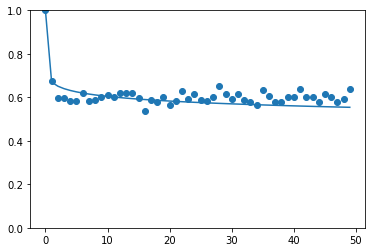

In [39]:
x = np.arange(0,Lx)

for i, L in enumerate(Ly_list):
    corr_array[i,0] = n_runs
    #if i!=4: continue
    plt.scatter(x, corr_array[i, :]/n_runs)
    
plt.ylim(0, 1)
#plt.xlim(0, 20)
d = 0.1
A = 0.4
plt.plot(x, np.exp(-A*x**d))

In [22]:
#full_spectrum = get_full_spectrum(system)
#plt.plot(sorted(full_spectrum),'o')

In [7]:
file = np.load("Spin_spin_corr_J1.0_h1.01663202697.84411.npz")
data = file['data']
label = file['label']

1663107153.948563